# Setting

## Library

In [1]:
import pandas as pd
import numpy as np

import os
import random
from tqdm.notebook import tqdm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## Fixed Random Seed

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

# Load Data Set

## Google Drive Mount

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip File

In [6]:
!unzip --qq '/content/drive/MyDrive/머신러닝 엔지니어링/데이콘/사기거래/data/사기거래.zip'

## Load Train / Val / Test

In [7]:
train = pd.read_csv('/content/train.csv')
val = pd.read_csv('/content/val.csv')
test = pd.read_csv('/content/test.csv')

# Check Data Set

In [8]:
display(train.head(),
        val.head(),
        test.head())

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [9]:
print(train.shape,
      val.shape,
      test.shape)

(113842, 31) (28462, 32) (142503, 31)


In [10]:
print(train.isnull().sum().sum(),
      val.isnull().sum().sum())

0 0


In [11]:
display(train.drop(columns='ID').describe(),
        val.drop(columns=['ID', 'Class']).describe())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,-0.002299,...,0.000013,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916
std,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,1.084560,...,0.700859,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246
min,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,-22.187089,...,-14.004410,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878
25%,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,-0.540463,...,-0.226196,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884
50%,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,-0.099386,...,-0.029430,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156
75%,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,0.452763,...,0.186905,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828
max,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,12.161890,...,22.599543,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975


In [12]:
cond = (val['Class']==0)

val.loc[cond, 'Class'] = 'Normal'
val.loc[~cond, 'Class'] = 'Anomaly'

print(val['Class'].value_counts())

Normal     28432
Anomaly       30
Name: Class, dtype: int64


# EDA

In [13]:
def print_statistics_1(data, col):

  max = data[col].max()
  min = data[col].min()
  mean = data[col].mean()
  median = data[col].median()
  std = data[col].std()

  print(f'\n{col}의 최대값 : {max}')
  print(f'{col}의 최소값 : {min}')
  print(f'{col}의 평균값 : {mean}')
  print(f'{col}의 중앙값 : {median}')
  print(f'{col}의 표준편차 : {std}\n')

In [14]:
def print_statistics_2(train, val, col):

  train_max = train[col].max()
  val_max = val[col].max()

  train_min = train[col].min()
  val_min = val[col].min()

  train_mean = train[col].mean()
  val_mean = val[col].mean()

  train_median = train[col].median()
  val_median = val[col].median()

  train_std = train[col].std()
  val_std = val[col].std()

  print(f'\nTrain {col}의 최대값 : {train_max}')
  print(f'Val {col}의 최대값 : {val_max}\n')

  print(f'Train {col}의 최소값 : {train_min}')
  print(f'Val {col}의 최소값 : {val_min}\n')

  print(f'Train {col}의 평균값 : {train_mean}')
  print(f'Val {col}의 평균값 : {val_mean}\n')

  print(f'Train {col}의 중앙값 : {train_median}')
  print(f'Val {col}의 중앙값 : {val_median}\n')

  print(f'Train {col}의 표준편차 : {train_std}')
  print(f'Val {col}의 표준편차 : {val_std}\n')

In [15]:
def EDA_Data_Set_1(data, drop_columns):

  for col in data.drop(columns=drop_columns).columns:

    print_statistics_1(data, col)

    fig, ax = plt.subplots(ncols=2, figsize=(15, 3))

    sns.histplot(data=data, x=col, ax=ax[0])
    ax[0].set_title(f"{col}'s Histogram")

    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[1].set_title(f"{col}'s Box Plot")

    plt.show()

In [17]:
def EDA_Data_Set_2(data, drop_columns):

  for col in data.drop(columns=drop_columns).columns:

    if col == 'Class':

      break

    print_statistics_1(data, col)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    sns.histplot(data=data, x=col, ax=ax[0, 0])
    ax[0, 0].set_title(f"{col}'s Histogram")

    sns.histplot(data=val.loc[data['Class']=='Anomaly'], x=col, ax=ax[0, 1])
    ax[0, 1].set_title(f"{col}'s Anomaly Histogram")

    sns.boxplot(data=data, x=col, ax=ax[1, 0])
    ax[1, 0].set_title(f"{col}'s Box Plot")

    sns.boxplot(data=data, x='Class', y=col, ax=ax[1, 1])
    ax[1, 1].set_title(f"{col}'s Box Plot by Class")

    plt.show()

In [18]:
def Heat_Map(data, drop_columns, data_name):

  data = data.drop(columns=drop_columns)

  fig, ax = plt.subplots(figsize=(16, 10))

  sns.heatmap(data.corr())
  ax.set_title(f"{data_name} Heat Map")

  plt.show()

In [19]:
def scatter_plot(data, x, y, hue):

  corr = np.corrcoef(data[x], data[y])[0, 1]
  print(f'상관계수 : {corr}\n')

  fig, ax = plt.subplots(figsize=(16, 10))

  sns.scatterplot(data=data, x=x, y=y, hue=hue)
  ax.set_title(f"{x} & {y} Scatter")

  plt.show()

## Train

### Heat Map

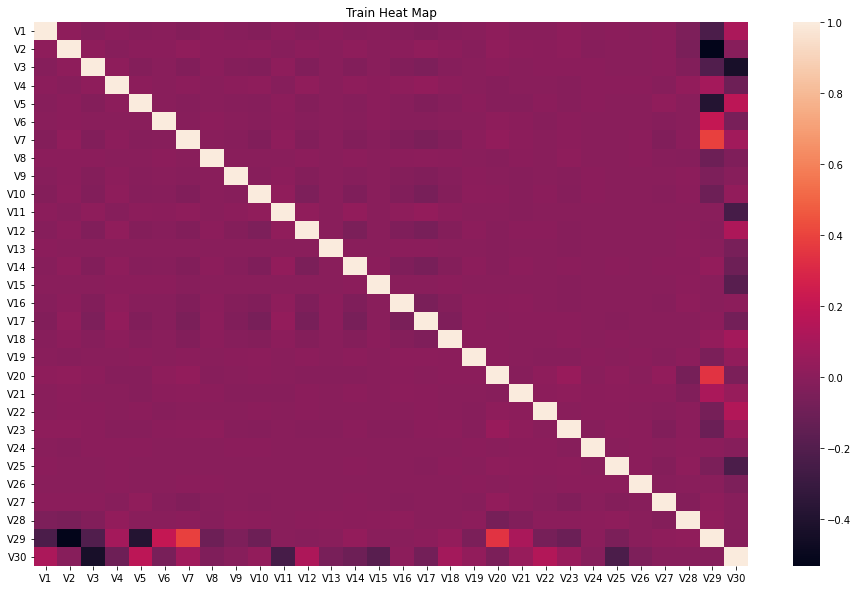

In [20]:
Heat_Map(train, ['ID'], 'Train')

### Scatter

#### Positive Correlation Coefficient

**V7 & V29**

상관계수 : 0.39123942177039084



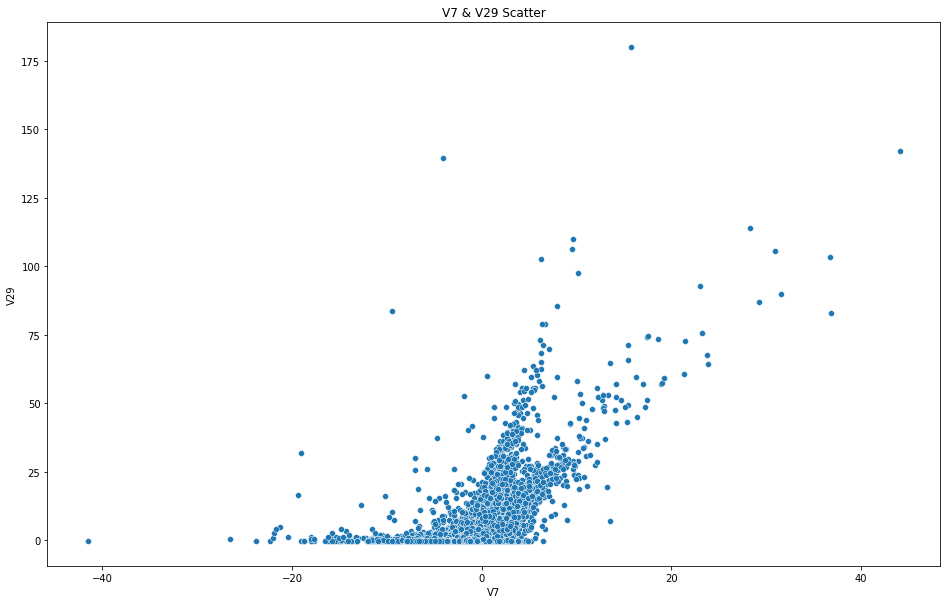

In [21]:
scatter_plot(data=train, x='V7', y='V29', hue=None)

**V20 & V29**

상관계수 : 0.3482192636898068



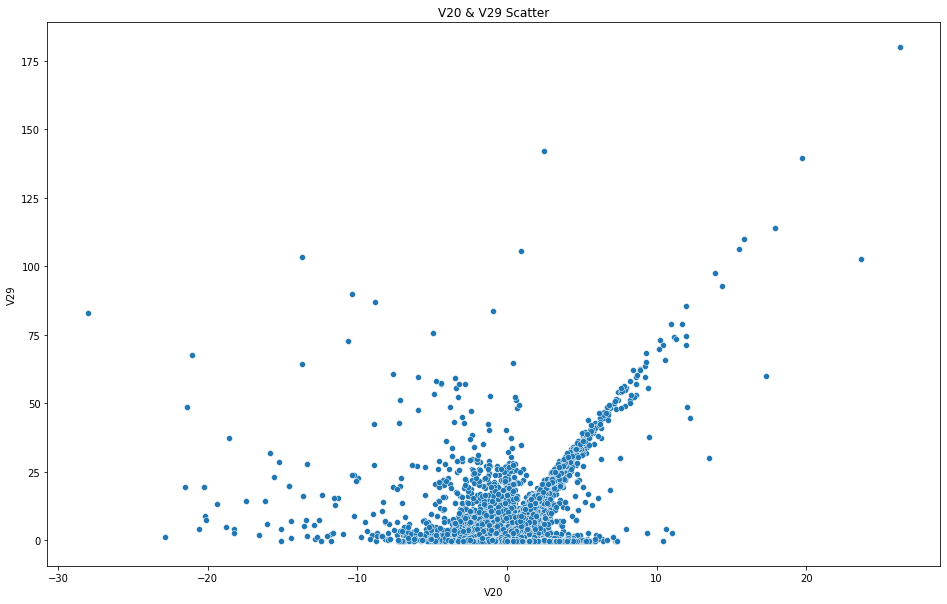

In [22]:
scatter_plot(data=train, x='V20', y='V29', hue=None)

#### Negative Correlation Coefficient

**V2 & V29**

상관계수 : -0.5307373283987076



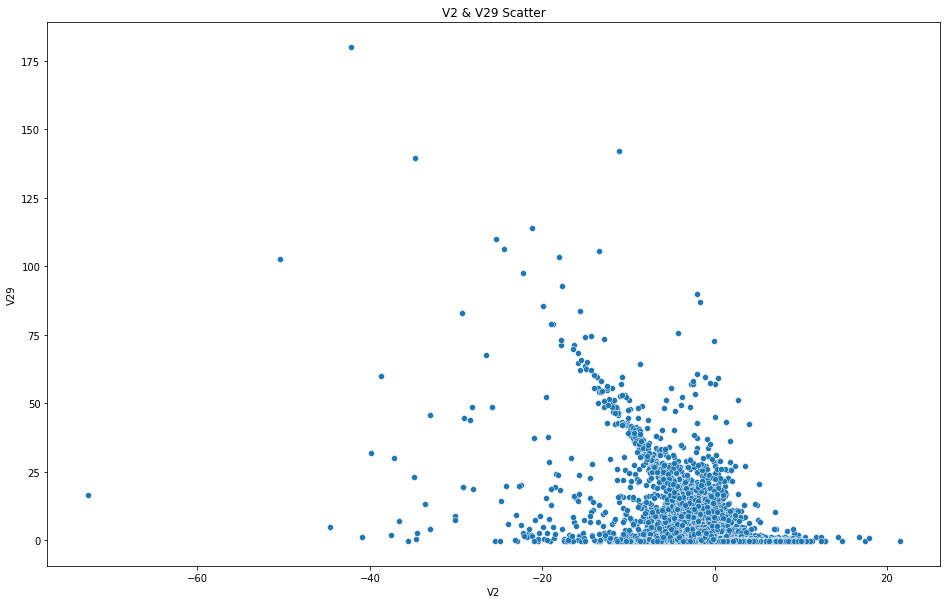

In [23]:
scatter_plot(data=train, x='V2', y='V29', hue=None)

**V3 & V30**

상관계수 : -0.4297866482472341



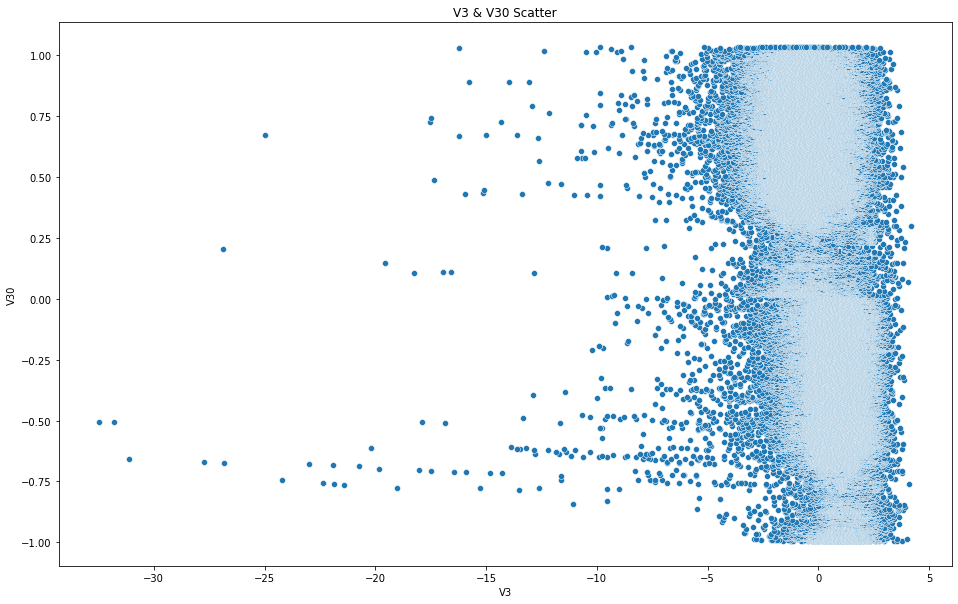

In [24]:
scatter_plot(data=train, x='V3', y='V30', hue=None)

**V5 & V29**

상관계수 : -0.38274706592548874



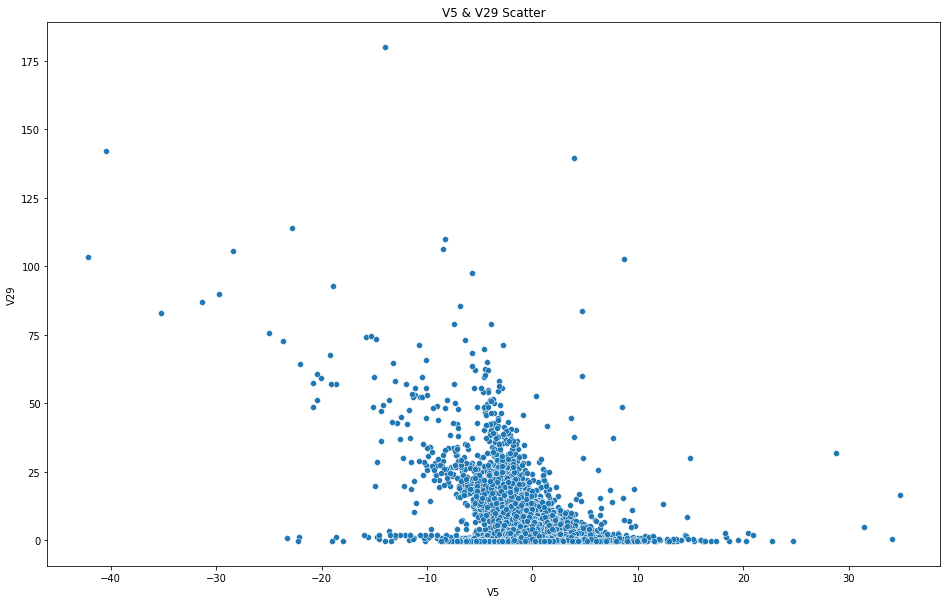

In [25]:
scatter_plot(data=train, x='V5', y='V29', hue=None)

### Histogram & Box Plot


V1의 최대값 : 2.45492999121121
V1의 최소값 : -56.407509631329
V1의 평균값 : 0.00019729098661136333
V1의 중앙값 : 0.01207362136827825
V1의 표준편차 : 1.9510604522492707



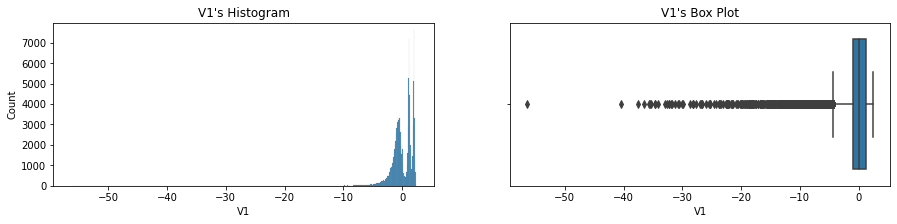


V2의 최대값 : 21.4672029942752
V2의 최소값 : -72.7157275629303
V2의 평균값 : 0.0012887947752847964
V2의 중앙값 : 0.06639026082044969
V2의 표준편차 : 1.6510635788198469



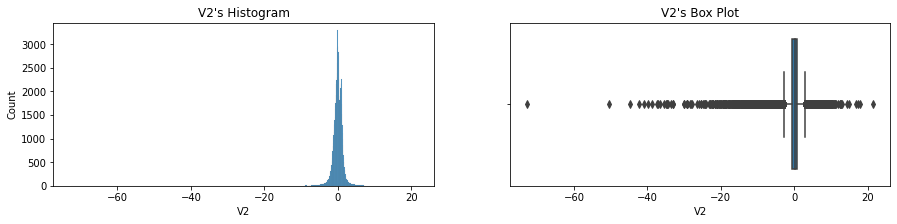


V3의 최대값 : 4.18781059904763
V3의 최소값 : -32.4541981862547
V3의 평균값 : 0.009717362937767754
V3의 중앙값 : 0.183867815323936
V3의 표준편차 : 1.4969157270583686



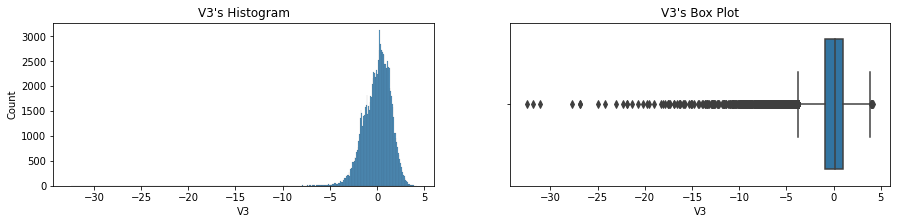


V4의 최대값 : 16.4912171736623
V4의 최소값 : -5.6006071412151
V4의 평균값 : -0.004169208277632673
V4의 중앙값 : -0.019359487922923302
V4의 표준편차 : 1.412633171594734



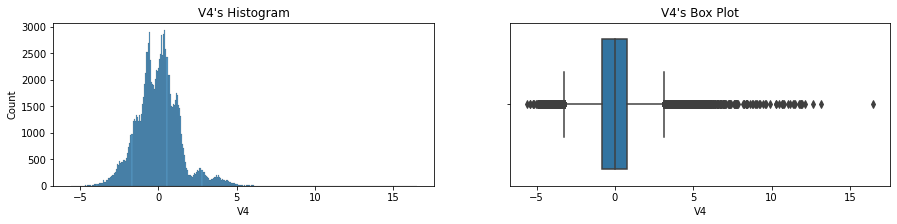


V5의 최대값 : 34.8016658766686
V5의 최소값 : -42.1478983728015
V5의 평균값 : 0.00047499618187236547
V5의 중앙값 : -0.054059608935735054
V5의 표준편차 : 1.367533486735317



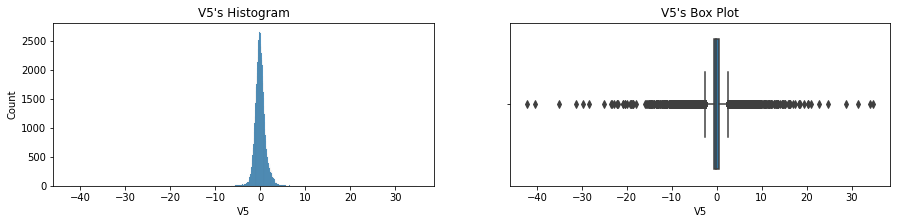


V6의 최대값 : 23.9178371266367
V6의 최소값 : -26.1605059358433
V6의 평균값 : 0.005141157690735944
V6의 중앙값 : -0.272435589201947
V6의 표준편차 : 1.3305827734281754



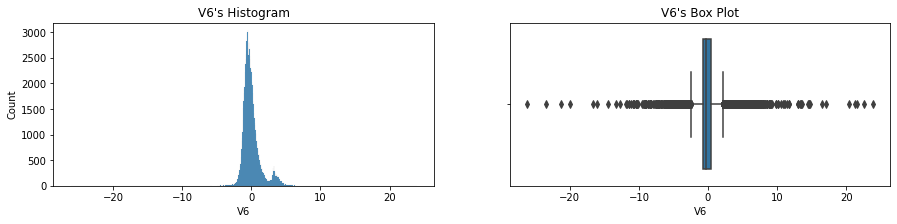


V7의 최대값 : 44.0544613631638
V7의 최소값 : -41.5067960832574
V7의 평균값 : 0.0057690238842603115
V7의 중앙값 : 0.039036187676720846
V7의 표준편차 : 1.2041108132981733



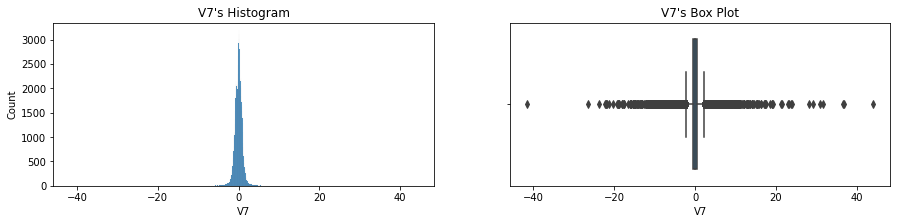


V8의 최대값 : 20.0072083651213
V8의 최소값 : -50.9433688677023
V8의 평균값 : -0.0024505883004975835
V8의 중앙값 : 0.0209696520444015
V8의 표준편차 : 1.1855042538309344



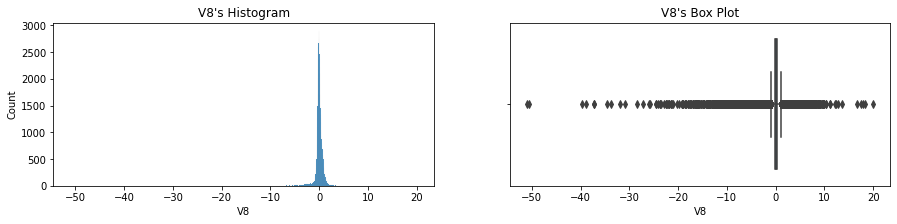


V9의 최대값 : 10.3928888246785
V9의 최소값 : -13.4340663182301
V9의 평균값 : -0.002107068687996854
V9의 중앙값 : -0.0521569296307329
V9의 표준편차 : 1.0954151622035642



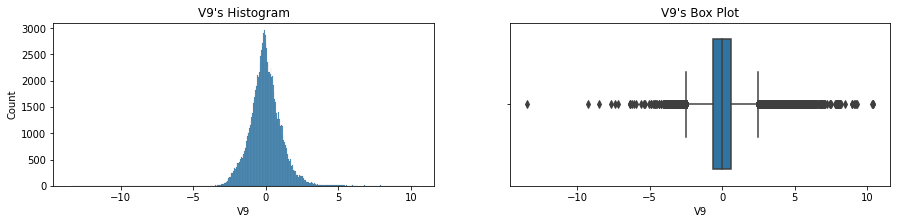


V10의 최대값 : 15.3317415557881
V10의 최소값 : -24.4031849699728
V10의 평균값 : 0.005209412662028898
V10의 중앙값 : -0.0908096855072013
V10의 표준편차 : 1.0713372717719878



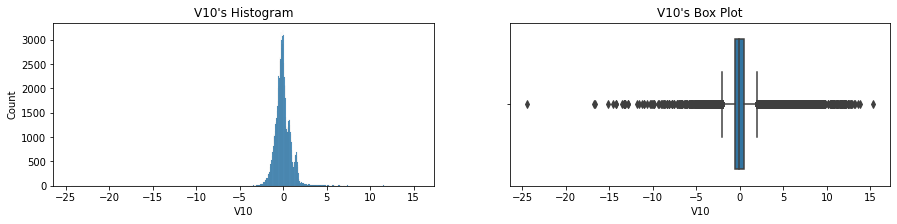


V11의 최대값 : 10.446846814514
V11의 최소값 : -4.68293054765276
V11의 평균값 : -0.0016864005258888273
V11의 중앙값 : -0.03440545072255165
V11의 표준편차 : 1.01468861204786



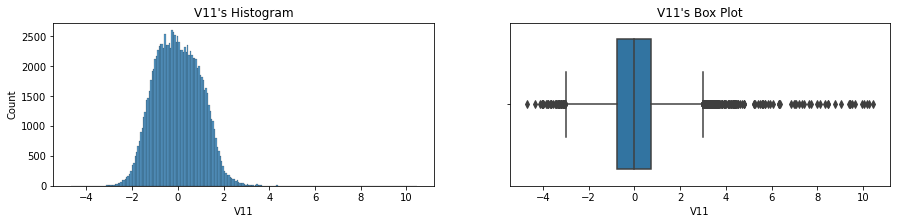


V12의 최대값 : 4.31807083997779
V12의 최소값 : -18.5536970096458
V12의 평균값 : 0.003944336708458373
V12의 중앙값 : 0.14143396998729552
V12의 표준편차 : 0.9770393721889566



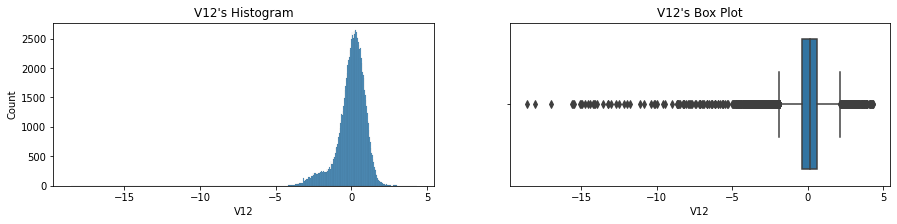


V13의 최대값 : 4.56900895856606
V13의 최소값 : -3.84497361209561
V13의 평균값 : 0.0020432913532953444
V13의 중앙값 : -0.010846694558323149
V13의 표준편차 : 0.9949080604768155



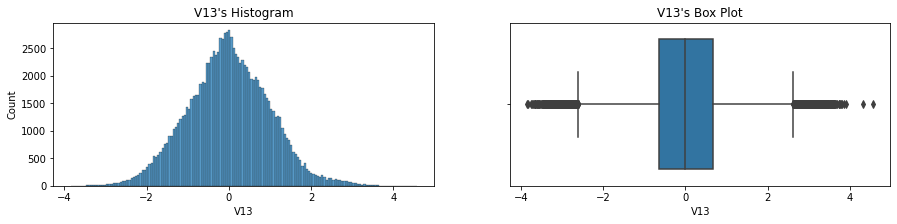


V14의 최대값 : 7.51840278124594
V14의 최소값 : -15.6231873302985
V14의 평균값 : 0.004397322699922775
V14의 중앙값 : 0.0521569486240506
V14의 표준편차 : 0.9337533293727834



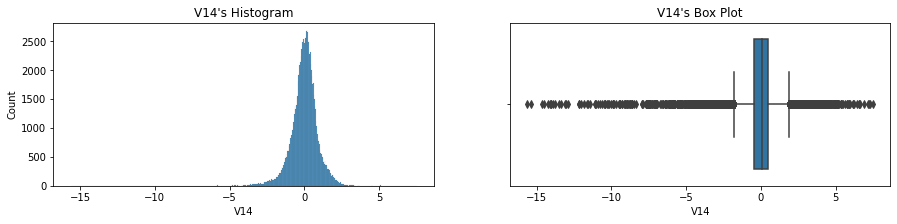


V15의 최대값 : 5.78451388962946
V15의 최소값 : -4.15253175950472
V15의 평균값 : -0.0005004147332574053
V15의 중앙값 : 0.048524452221400144
V15의 표준편차 : 0.9156656449739775



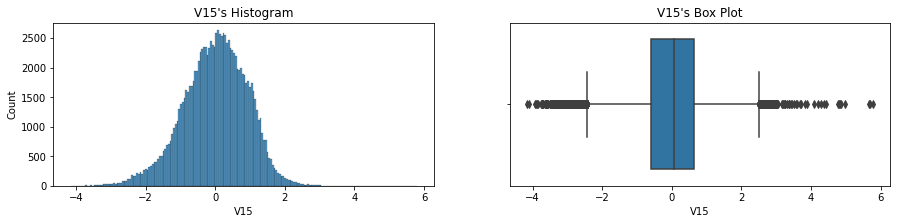


V16의 최대값 : 8.28988955954619
V16의 최소값 : -13.30388757707
V16의 평균값 : 0.002905432082529999
V16의 중앙값 : 0.0664341250021616
V16의 표준편차 : 0.8649033262281823



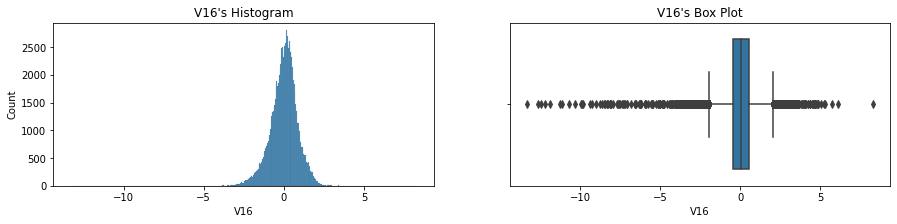


V17의 최대값 : 9.25352625047285
V17의 최소값 : -21.2979057823155
V17의 평균값 : 0.003397329184032439
V17의 중앙값 : -0.06693894995534486
V17의 표준편차 : 0.80855207696864



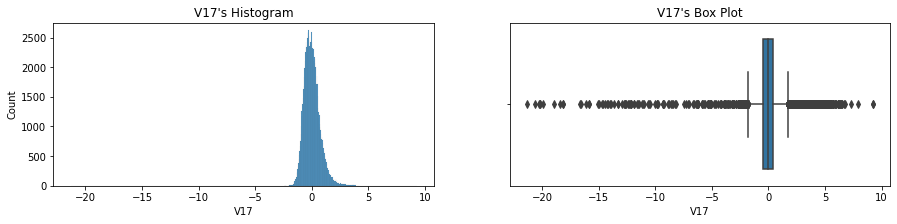


V18의 최대값 : 4.2956482344645
V18의 최소값 : -8.66881519685045
V18의 평균값 : 0.0011144019564926022
V18의 중앙값 : -0.0046325153441596
V18의 표준편차 : 0.8307631372452877



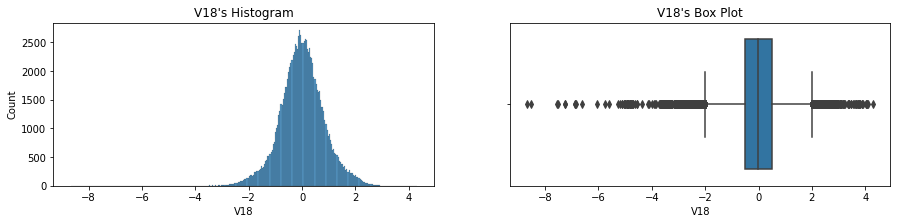


V19의 최대값 : 4.71514167078375
V19의 최소값 : -4.93273305547833
V19의 평균값 : 0.0003000597969664966
V19의 중앙값 : 0.00465697882936915
V19의 표준편차 : 0.8145423008581303



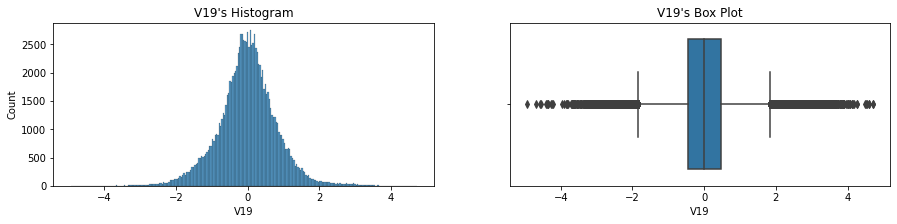


V20의 최대값 : 26.2373907895659
V20의 최소값 : -28.009635333749
V20의 평균값 : -0.0004995680282647515
V20의 중앙값 : -0.0628905006924982
V20의 표준편차 : 0.7633262147916938



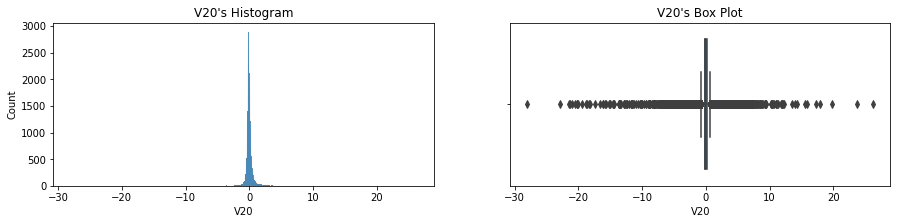


V21의 최대값 : 27.2028391573154
V21의 최소값 : -22.7575398590576
V21의 평균값 : -0.0012424691313204178
V21의 중앙값 : -0.030281477600194097
V21의 표준편차 : 0.7220012926392156



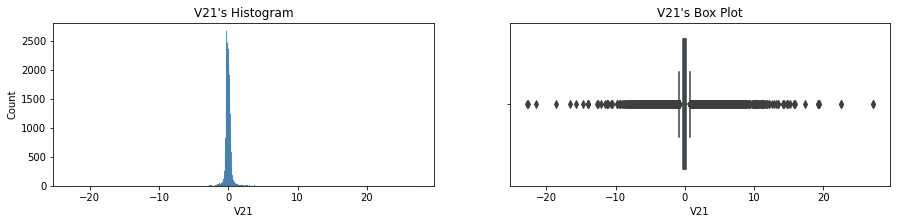


V22의 최대값 : 8.36198519168435
V22의 최소값 : -8.88701714094871
V22의 평균값 : 4.0883465609378427e-07
V22의 중앙값 : 0.00834580698293555
V22의 표준편차 : 0.723829061858326



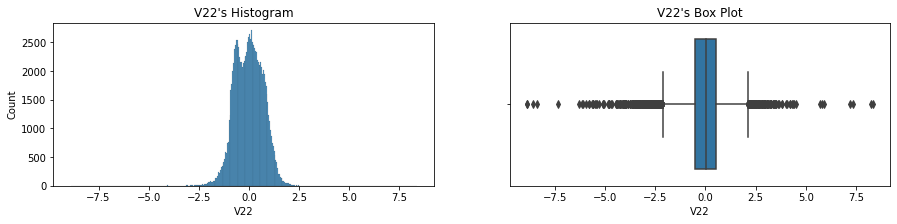


V23의 최대값 : 22.5284116897749
V23의 최소값 : -44.8077352037913
V23의 평균값 : -0.0013174176267935621
V23의 중앙값 : -0.012260984700957801
V23의 표준편차 : 0.6360608348896047



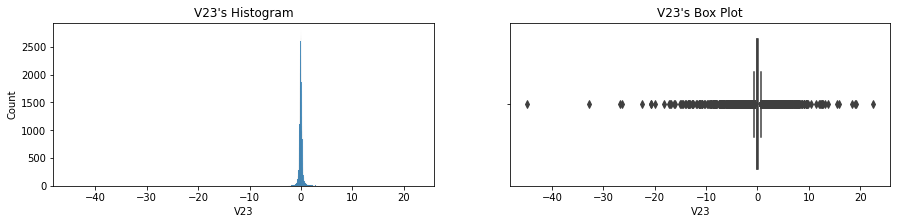


V24의 최대값 : 4.02286589044732
V24의 최소값 : -2.82484890293617
V24의 평균값 : -0.0008841493522409324
V24의 중앙값 : 0.04057349018340555
V24의 표준편차 : 0.6058543652030749



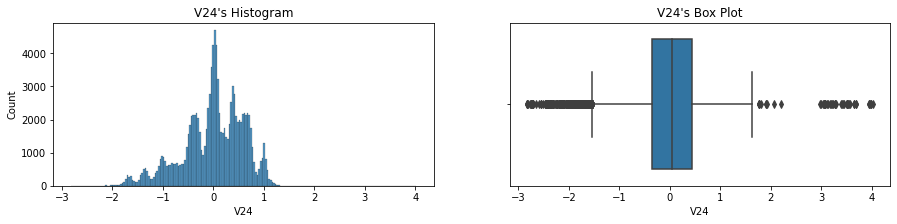


V25의 최대값 : 7.51958867870916
V25의 최소값 : -10.2953970749851
V25의 평균값 : 0.001680153622333995
V25의 중앙값 : 0.018278021175428
V25의 표준편차 : 0.5200694419728161



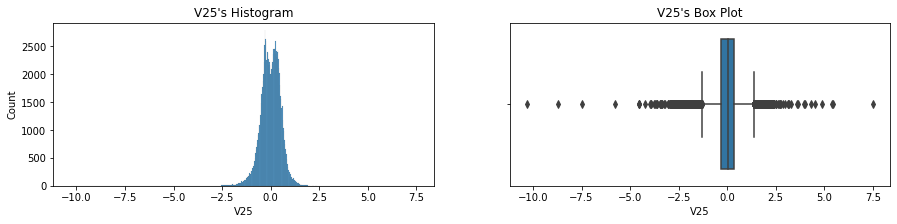


V26의 최대값 : 3.11929452903772
V26의 최소값 : -1.8553553377608
V26의 평균값 : -0.00029337012564088164
V26의 중앙값 : -0.052815375709404755
V26의 표준편차 : 0.48097857889866485



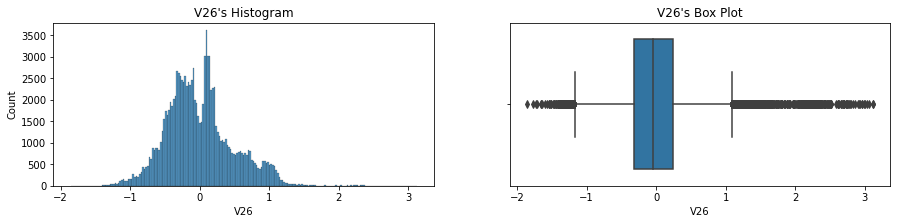


V27의 최대값 : 11.1357398445742
V27의 최소값 : -9.89524404755692
V27의 평균값 : -0.00023371284253036214
V27의 중앙값 : 0.00150188492327435
V27의 표준편차 : 0.39950548833452487



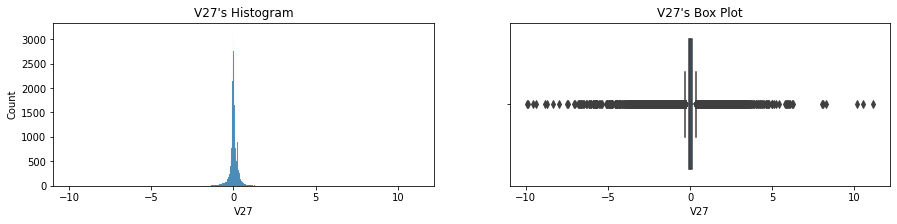


V28의 최대값 : 33.8478078188831
V28의 최소값 : -9.61791545238239
V28의 평균값 : -0.0005080545516753246
V28의 중앙값 : 0.011158211260897648
V28의 표준편차 : 0.3561296472138799



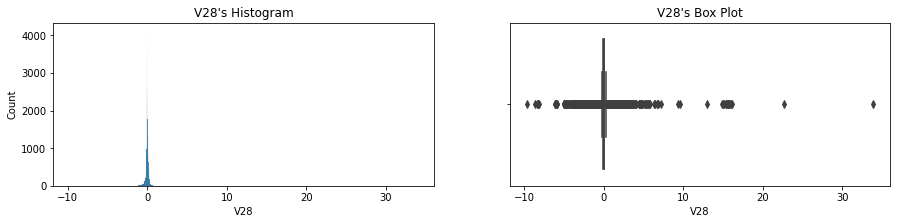


V29의 최대값 : 180.10102703835676
V29의 최소값 : -0.3074128414727869
V29의 평균값 : 0.9272530174662471
V29의 중앙값 : -0.0006986655488017
V29의 표준편차 : 3.4129328932881196



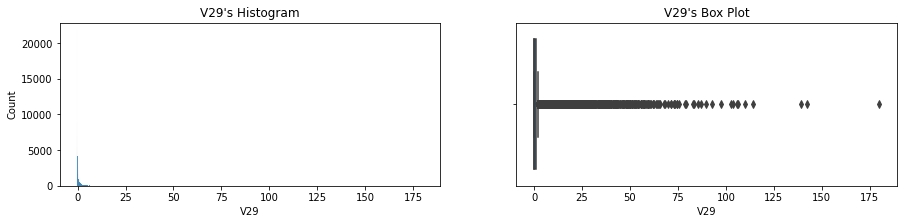


V30의 최대값 : 1.0349510685040944
V30의 최소값 : -0.9949717454387388
V30의 평균값 : 0.11623154312648176
V30의 중앙값 : -0.00259049095971515
V30의 표준편차 : 0.558160863013255



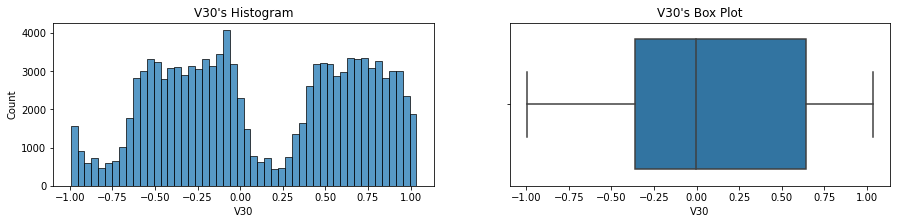

In [26]:
EDA_Data_Set_1(data=train, drop_columns=['ID'])

## Val

### Heat Map

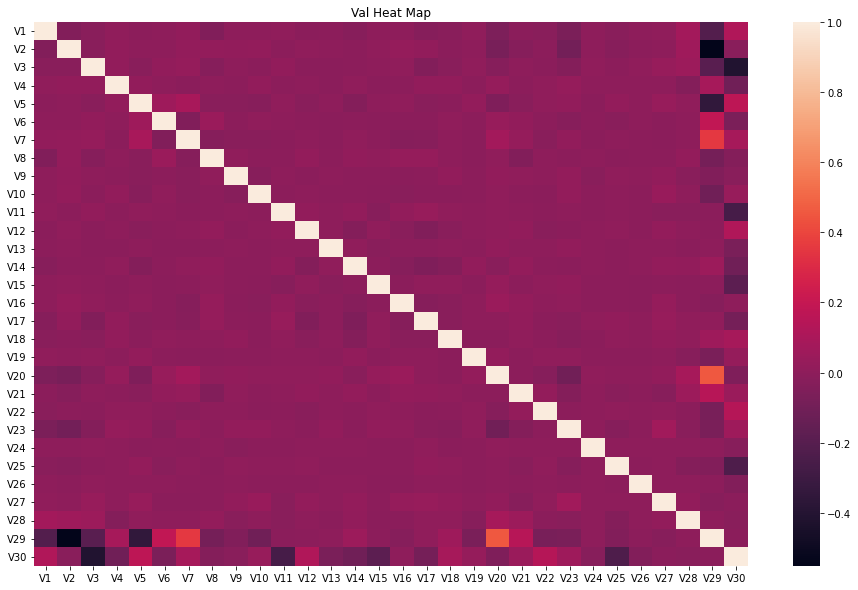

In [27]:
Heat_Map(val, ['ID', 'Class'], 'Val')

### Scatter

#### Positive Correlation Coefficient

**V7 & V29**

상관계수 : 0.3571861857440929



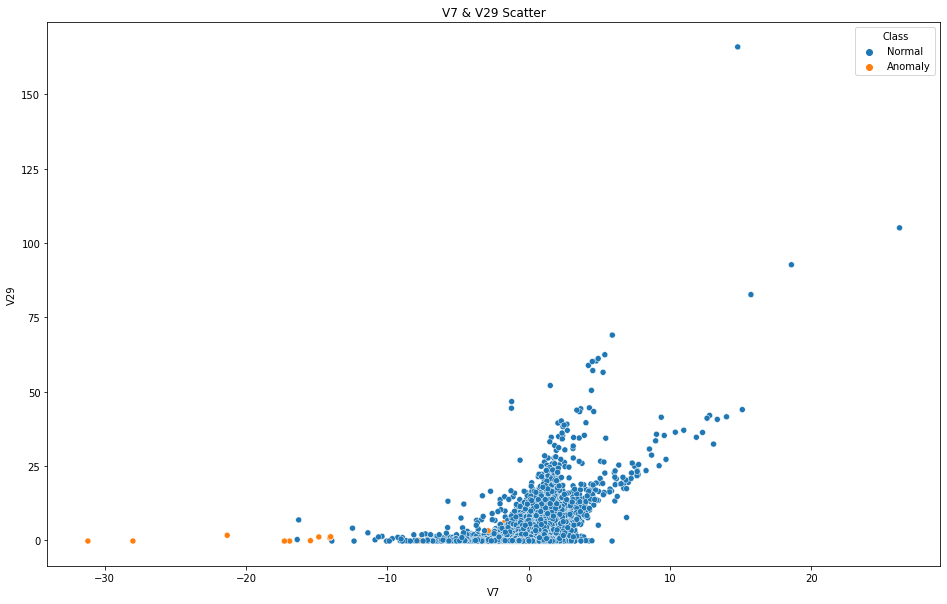

In [28]:
scatter_plot(data=val, x='V7', y='V29', hue='Class')

**V20 & V29**

상관계수 : 0.45965969899458936



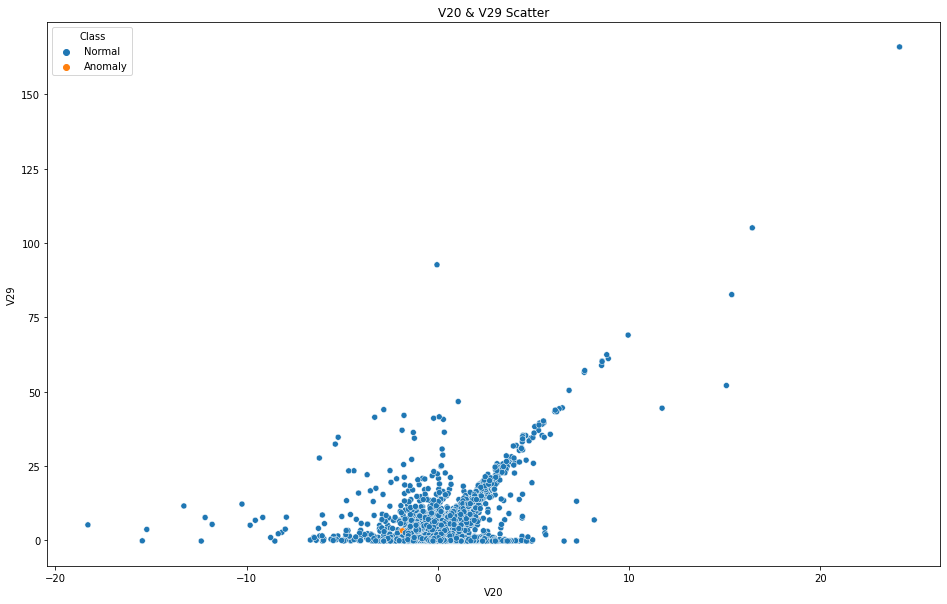

In [29]:
scatter_plot(data=val, x='V20', y='V29', hue='Class')

#### Negative Correlation Coefficient

**V2 * V29**

상관계수 : -0.5515689871996157



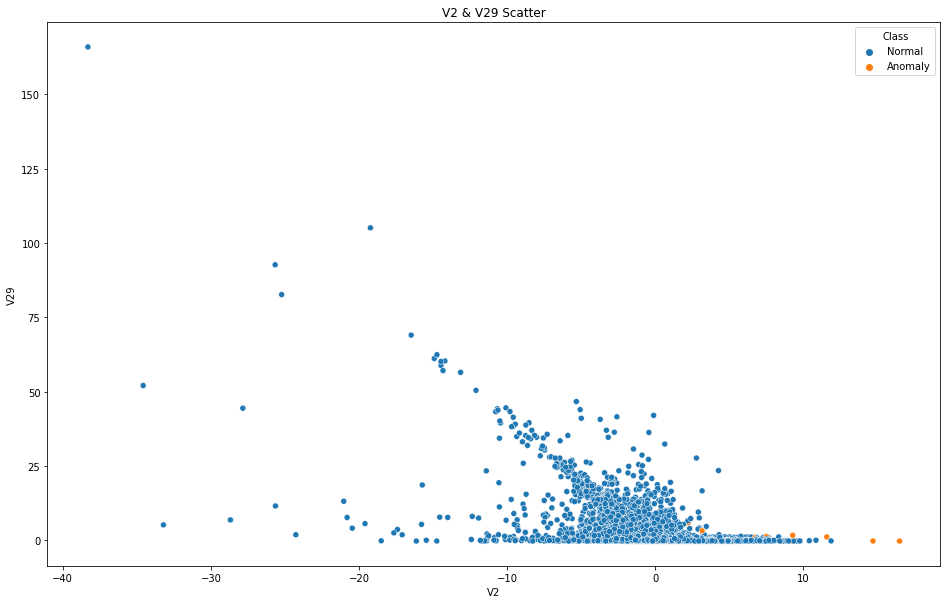

In [30]:
scatter_plot(data=val, x='V2', y='V29', hue='Class')

**V3 & V30**

상관계수 : -0.41595372416252013



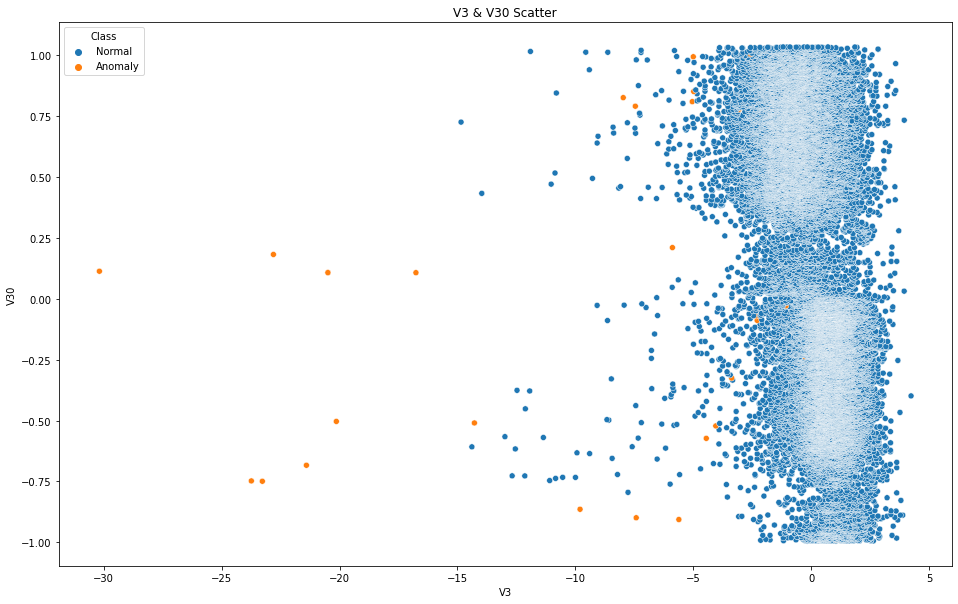

In [31]:
scatter_plot(data=val, x='V3', y='V30', hue='Class')

**V5 & V29**

상관계수 : -0.3502291027469973



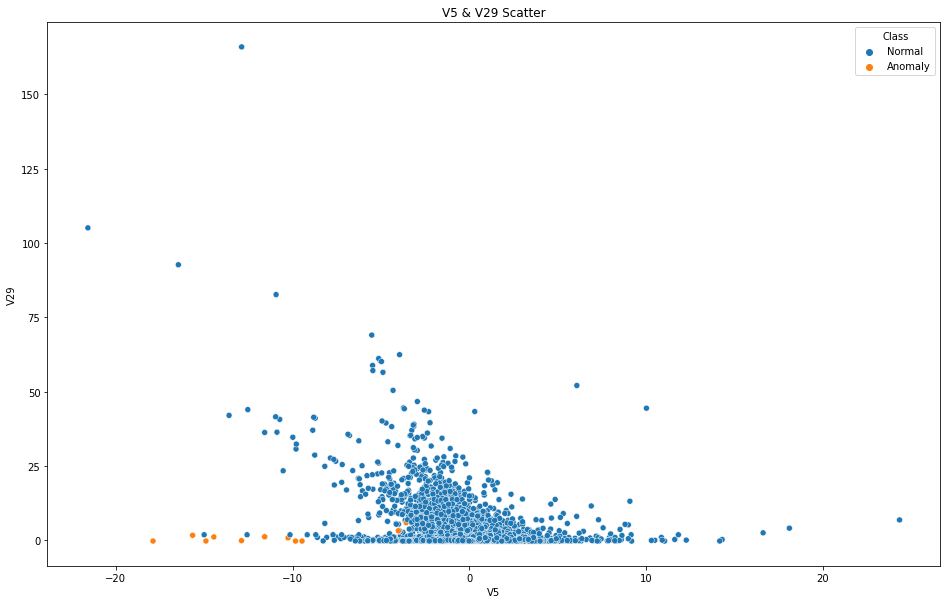

In [32]:
scatter_plot(data=val, x='V5', y='V29', hue='Class')

### Histogram & Box Plot


V1의 최대값 : 2.41176914096716
V1의 최소값 : -29.51612308269
V1의 평균값 : 0.0049667869432142705
V1의 중앙값 : 0.023586294744262
V1의 표준편차 : 1.9306399181872773



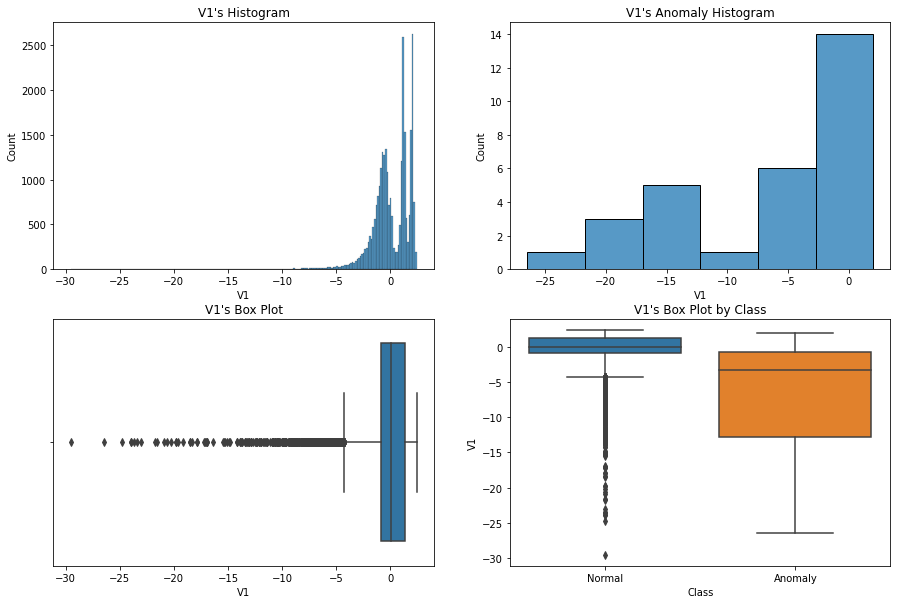


V2의 최대값 : 16.497471901867
V2의 최소값 : -38.3053101842846
V2의 평균값 : 0.002014126365322109
V2의 중앙값 : 0.07547006061396991
V2의 표준편차 : 1.605198334957249



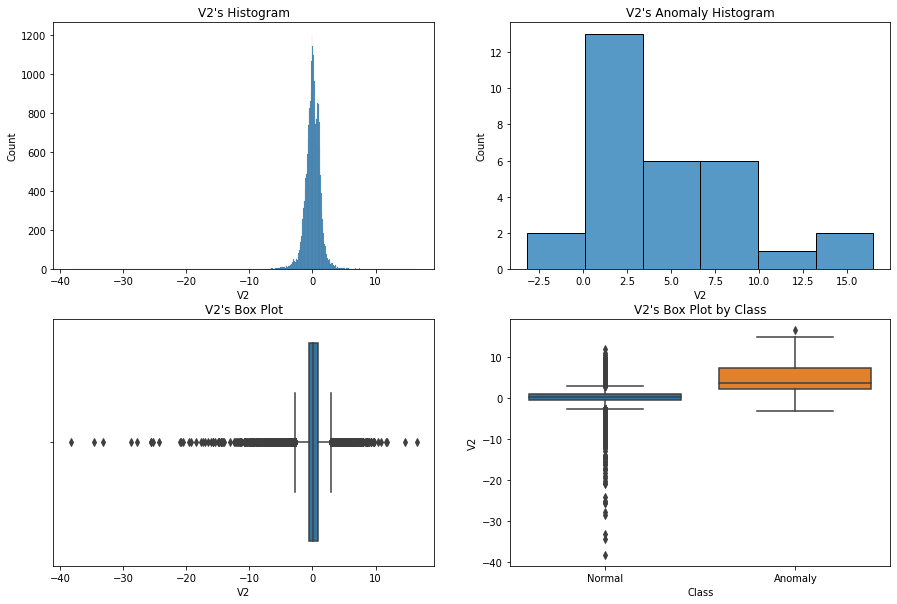


V3의 최대값 : 4.22610848028397
V3의 최소값 : -30.1773174564996
V3의 평균값 : 0.0014137261772706811
V3의 중앙값 : 0.17578352941122
V3의 표준편차 : 1.4997486930725425



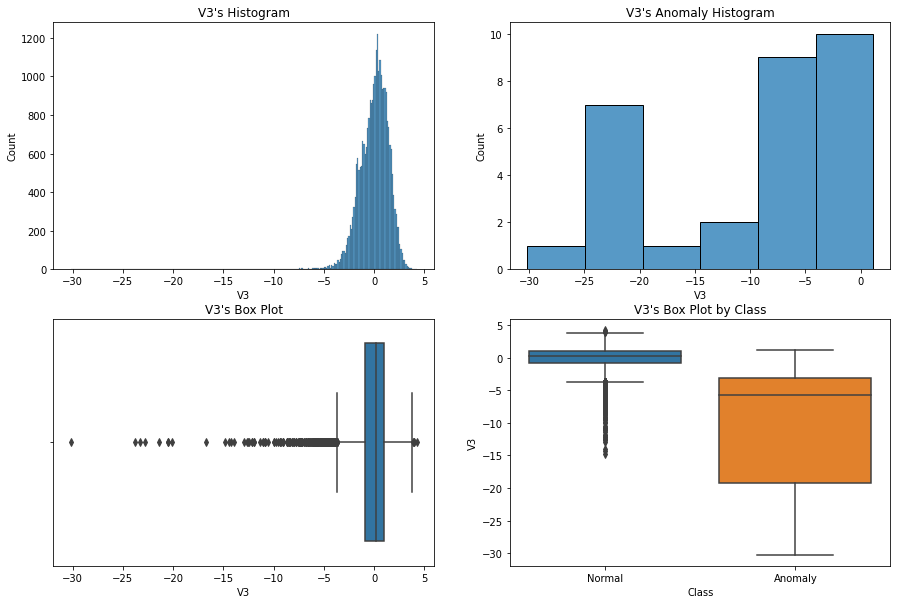


V4의 최대값 : 12.1146718424589
V4의 최소값 : -5.07124131015808
V4의 평균값 : 0.0018925265959060338
V4의 중앙값 : -0.02161930995486135
V4의 표준편차 : 1.4051386461227313



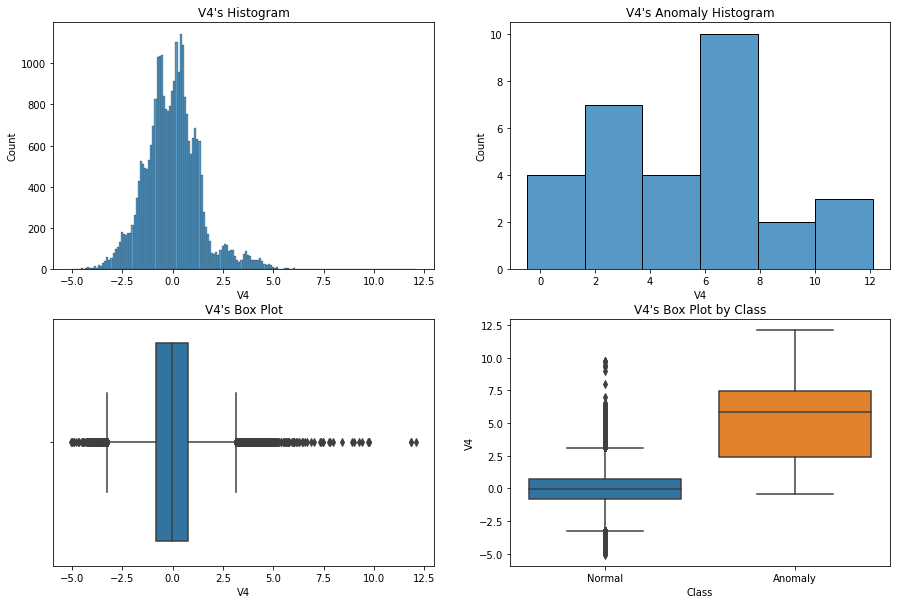


V5의 최대값 : 24.3453104894197
V5의 최소값 : -21.5770187944452
V5의 평균값 : -0.003968809374979428
V5의 중앙값 : -0.05278004050669385
V5의 표준편차 : 1.3351471626344458



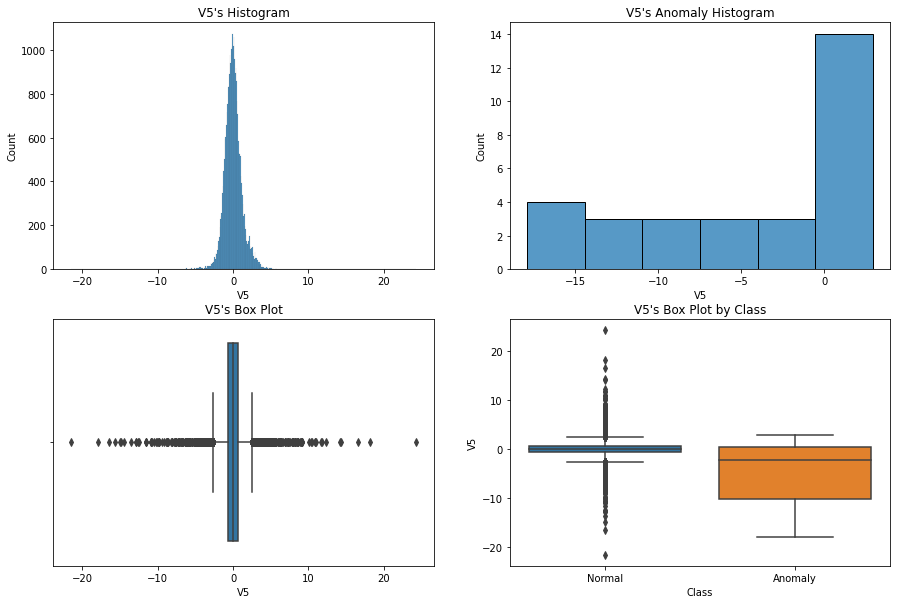


V6의 최대값 : 12.1289504125238
V6의 최소값 : -16.1726142472149
V6의 평균값 : -0.01772964458938549
V6의 중앙값 : -0.280742243126128
V6의 표준편차 : 1.2922144806789229



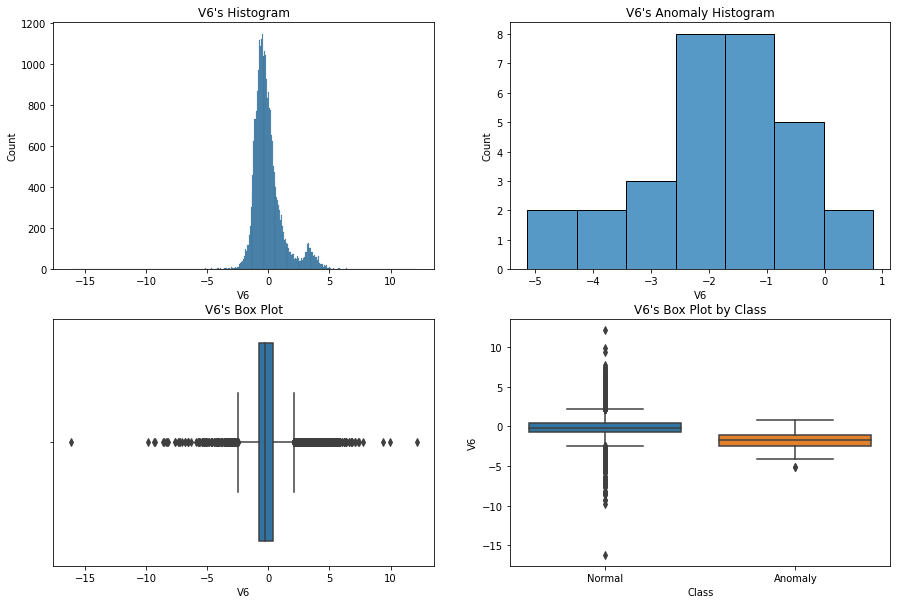


V7의 최대값 : 26.2377221989235
V7의 최소값 : -31.1973285494605
V7의 평균값 : 0.005555630415827993
V7의 중앙값 : 0.046279641142595404
V7의 표준편차 : 1.1651322380412819



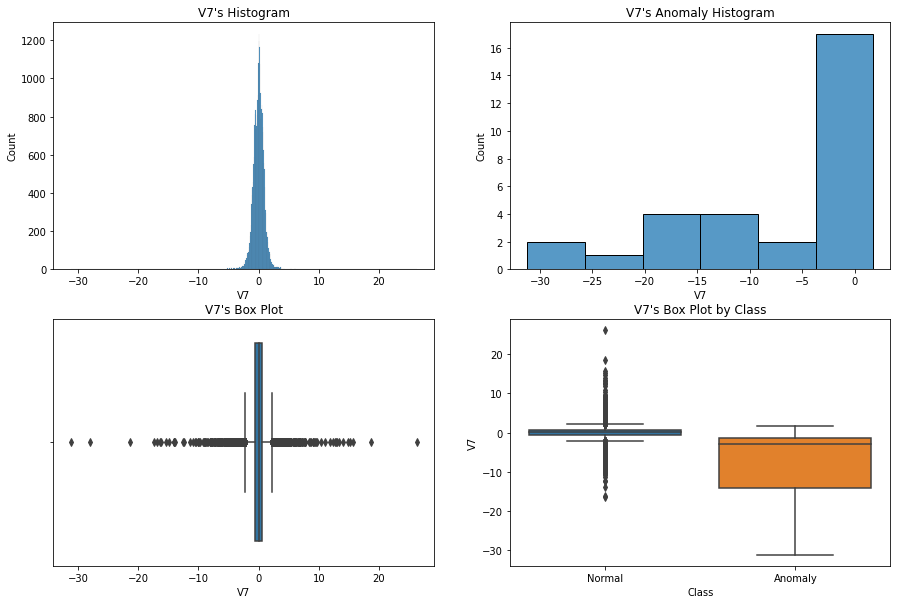


V8의 최대값 : 12.4311404723263
V8의 최소값 : -26.2780073456916
V8의 평균값 : 0.009023011049873238
V8의 중앙값 : 0.02262170687997565
V8의 표준편차 : 1.1035376657073763



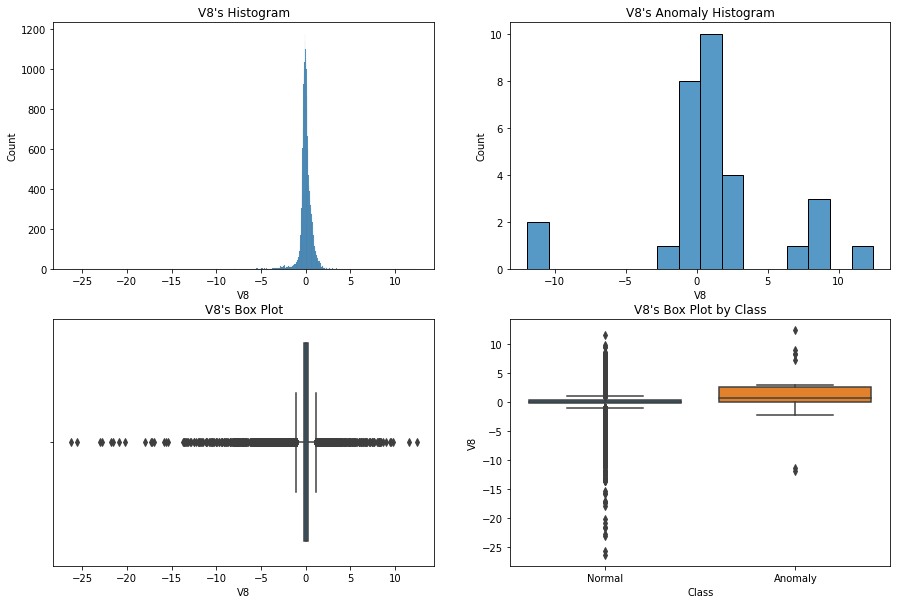


V9의 최대값 : 7.93741281438886
V9의 최소값 : -9.46257260540015
V9의 평균값 : -0.0049046109716675505
V9의 중앙값 : -0.06662254963706975
V9의 표준편차 : 1.0908428749008365



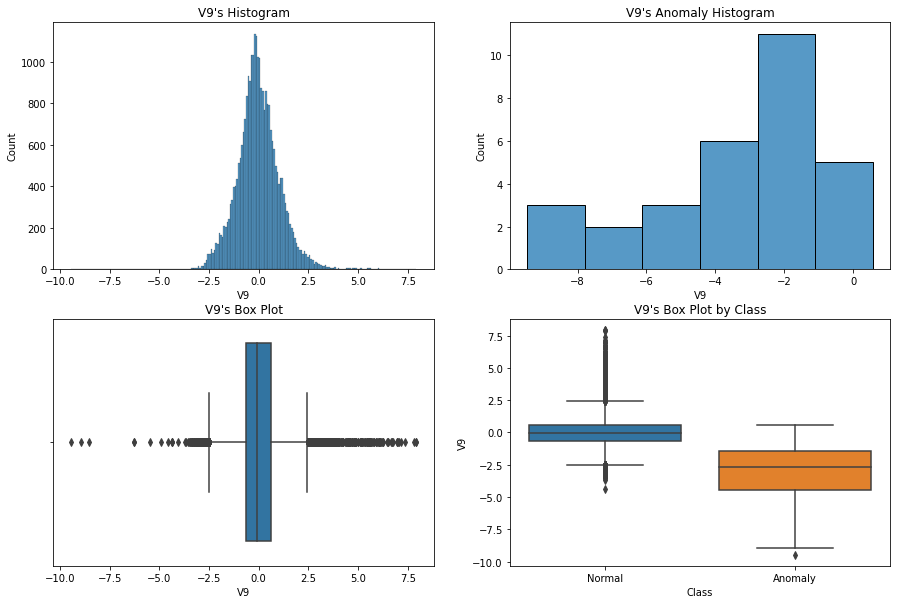


V10의 최대값 : 12.1618895253889
V10의 최소값 : -22.1870885620007
V10의 평균값 : -0.0022988978086047793
V10의 중앙값 : -0.09938615695686615
V10의 표준편차 : 1.0845602186545011



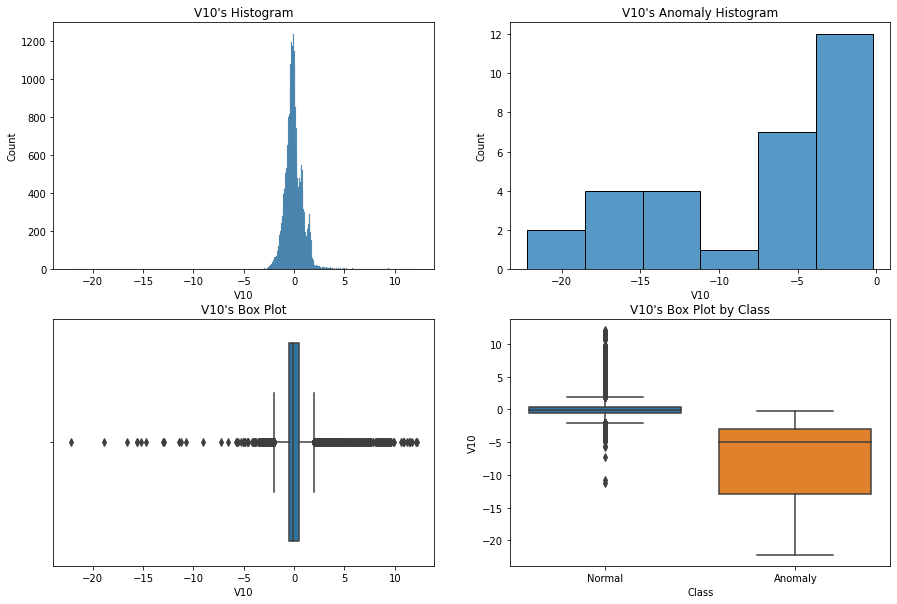


V11의 최대값 : 10.8530116481991
V11의 최소값 : -4.45385284150054
V11의 평균값 : 0.004006781755657953
V11의 중앙값 : -0.03352678462360805
V11의 표준편차 : 1.0165069542359406



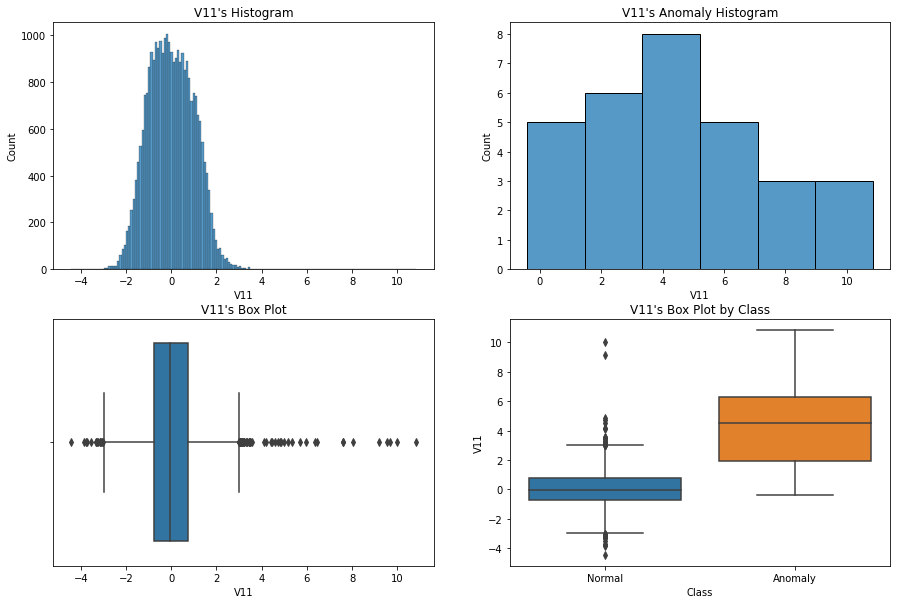


V12의 최대값 : 4.20268513071349
V12의 최소값 : -16.0603057628826
V12의 평균값 : 0.0024803582087939515
V12의 중앙값 : 0.137369558777824
V12의 표준편차 : 0.9907307300192104



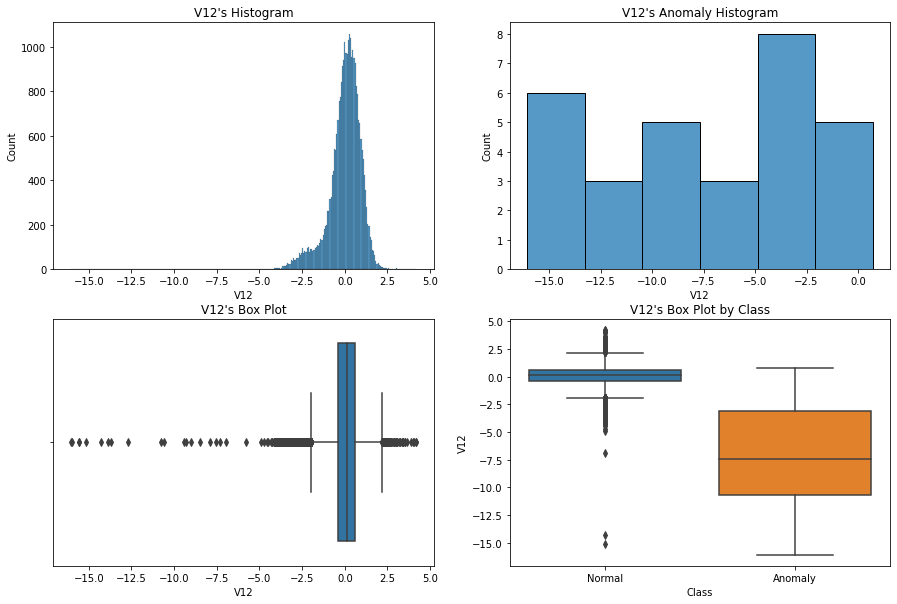


V13의 최대값 : 4.46541317709086
V13의 최소값 : -3.84894314852575
V13의 평균값 : 0.004170312115240116
V13의 중앙값 : -0.0123174635608043
V13의 표준편차 : 1.000558497099591



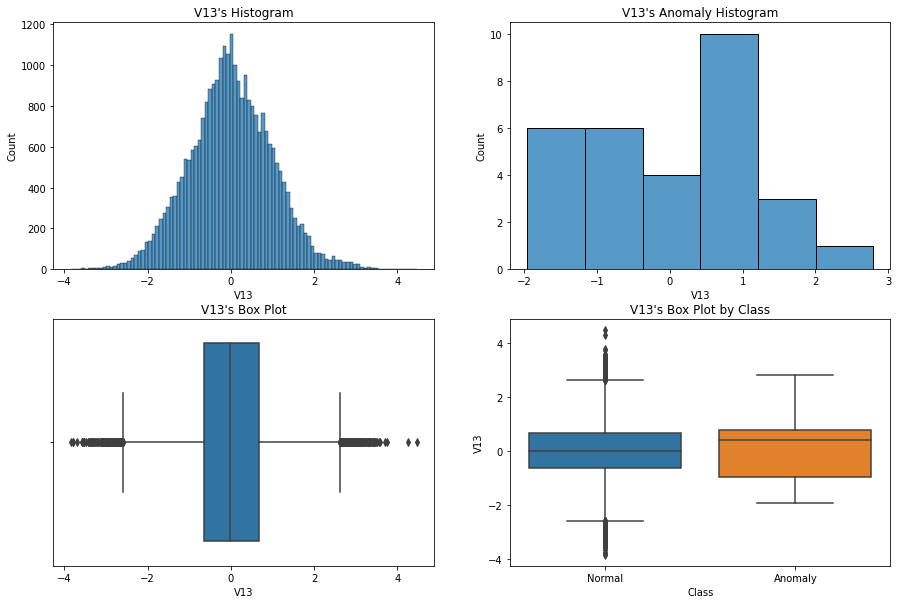


V14의 최대값 : 7.69220854356782
V14의 최소값 : -14.9529810390579
V14의 평균값 : 0.012298899880292084
V14의 중앙값 : 0.0596796082743124
V14의 표준편차 : 0.9387524563366265



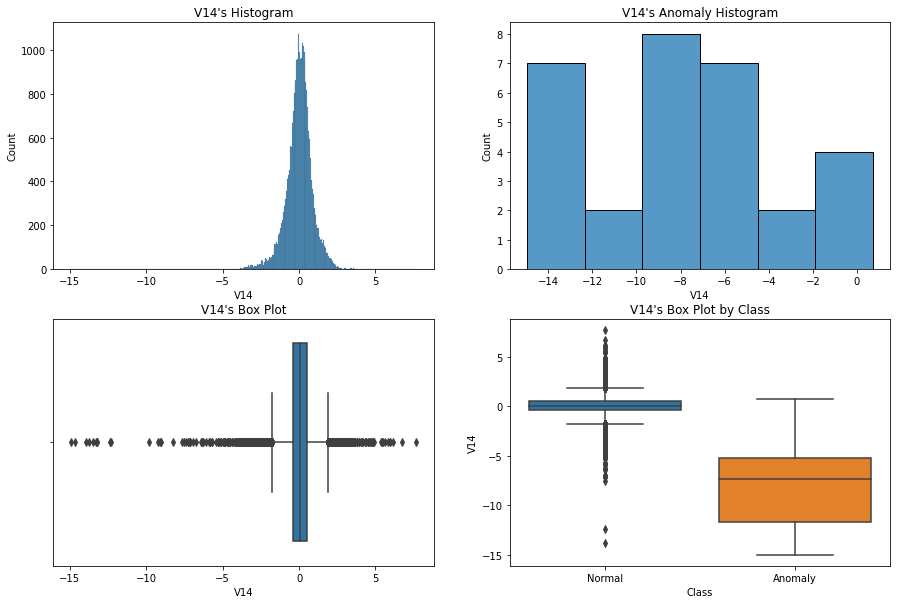


V15의 최대값 : 3.84573771222941
V15의 최소값 : -4.39130706780494
V15의 평균값 : 0.0031773891275799554
V15의 중앙값 : 0.053606202878213605
V15의 표준편차 : 0.91374716524497



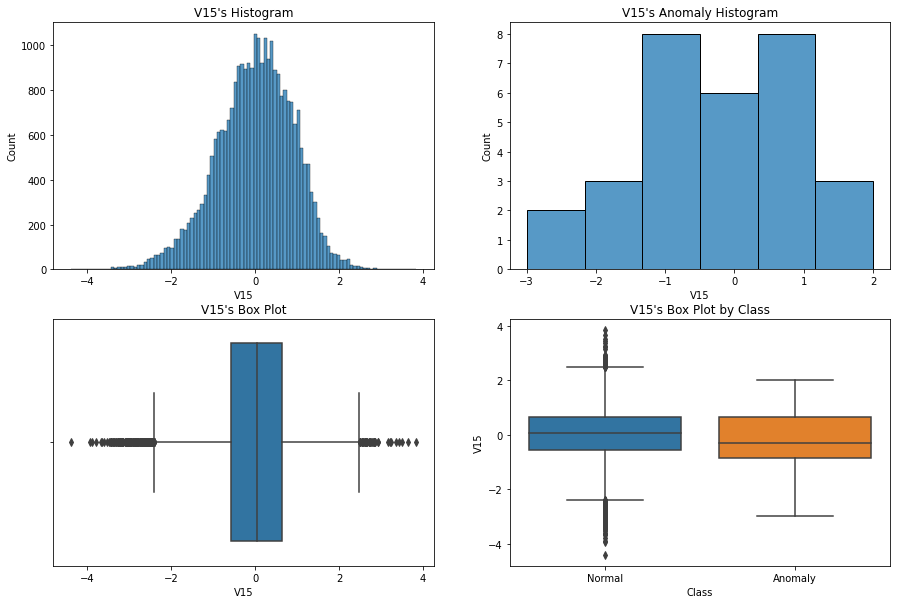


V16의 최대값 : 4.46222918501709
V16의 최소값 : -12.675268899047
V16의 평균값 : 0.004912565699131202
V16의 중앙값 : 0.07093079437153765
V16의 표준편차 : 0.8642892796858322



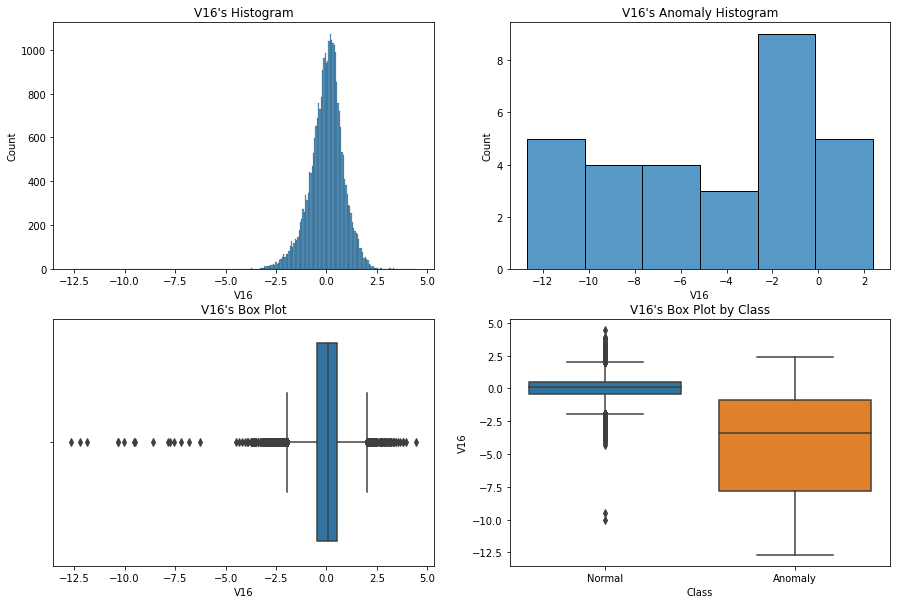


V17의 최대값 : 6.98354540000001
V17의 최소값 : -20.7406637223494
V17의 평균값 : 0.007552178839944638
V17의 중앙값 : -0.06617395002655896
V17의 표준편차 : 0.8215279789899009



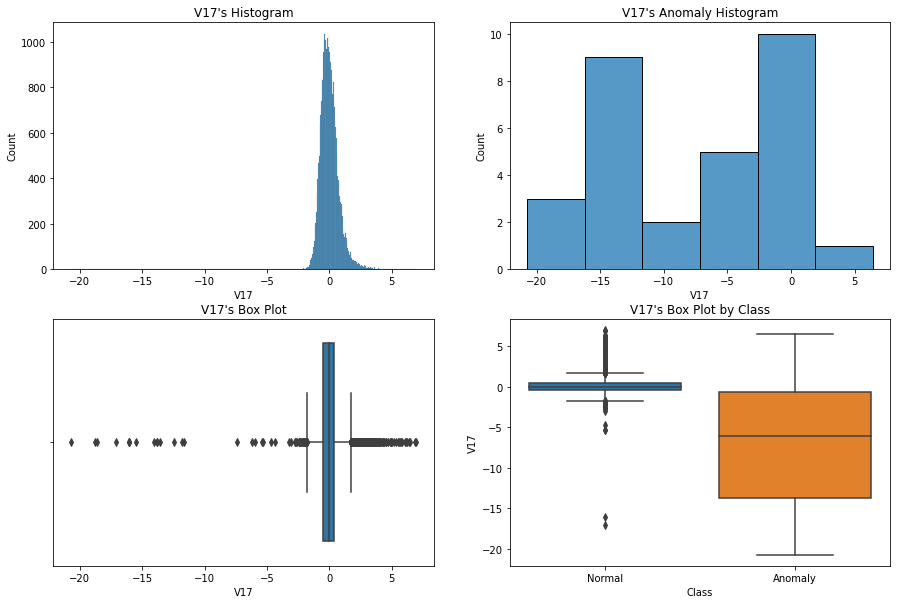


V18의 최대값 : 3.50591639849878
V18의 최소값 : -8.15366802624724
V18의 평균값 : 0.005732750100152666
V18의 중앙값 : 0.0008903603231762501
V18의 표준편차 : 0.8332798954824993



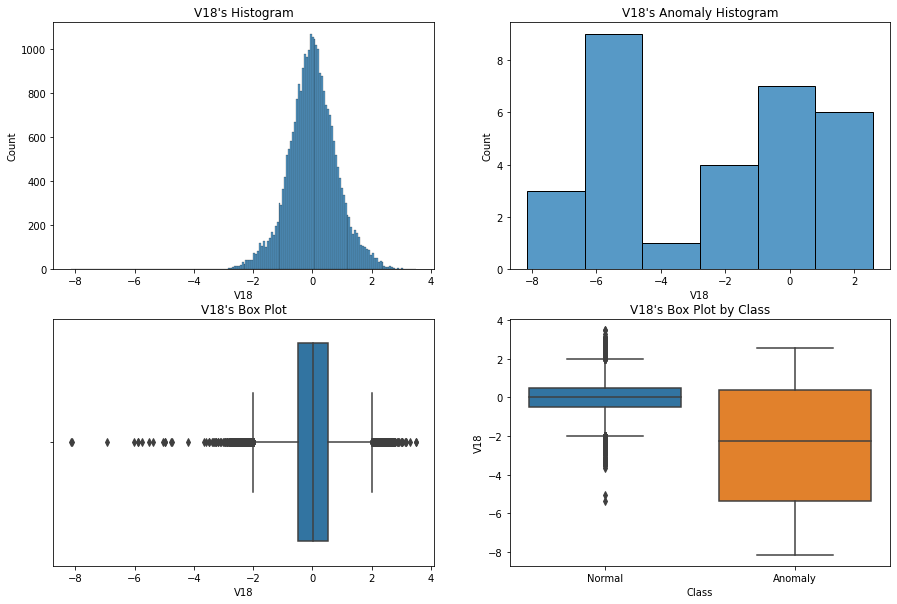


V19의 최대값 : 5.59197142733558
V19의 최소값 : -4.19714532925075
V19의 평균값 : 0.00014635166290159594
V19의 중앙값 : 0.00039663696864185
V19의 표준편차 : 0.8088973487376115



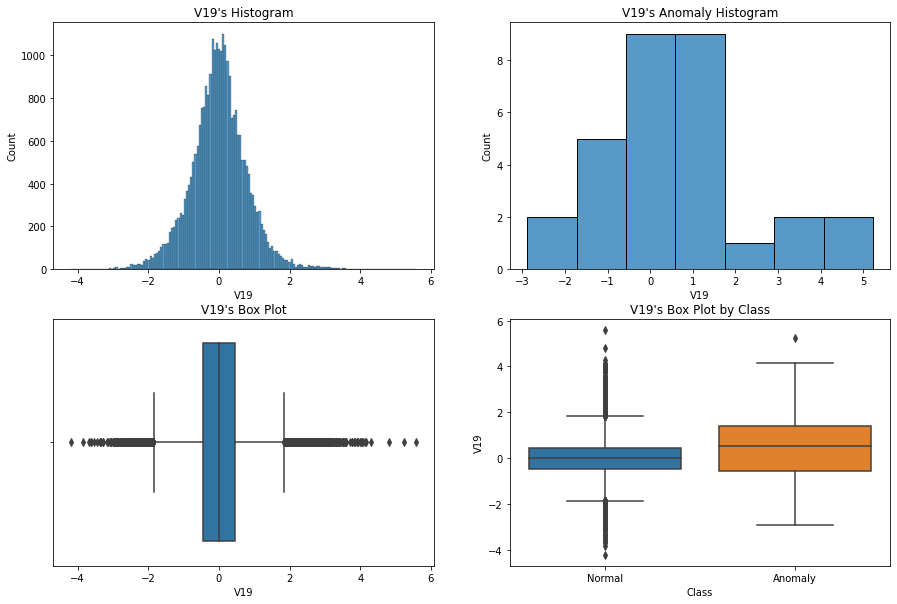


V20의 최대값 : 24.1338941917421
V20의 최소값 : -18.2923079729601
V20의 평균값 : 0.0019279818010212025
V20의 중앙값 : -0.0624809074044428
V20의 표준편차 : 0.7295830443241295



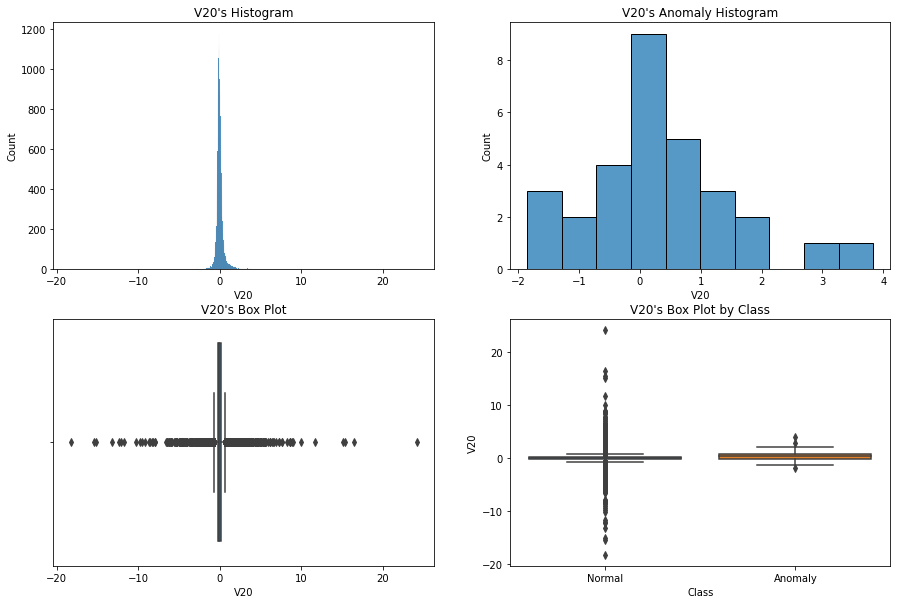


V21의 최대값 : 22.5995433627945
V21의 최소값 : -14.0044101719208
V21의 평균값 : 1.3363214228715426e-05
V21의 중앙값 : -0.02943017976292465
V21의 표준편차 : 0.7008590954858377



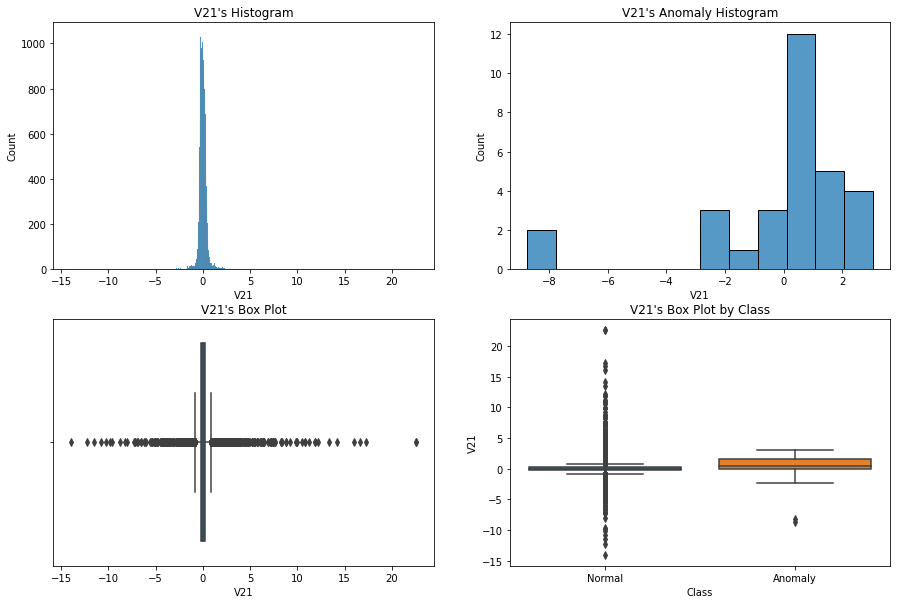


V22의 최대값 : 6.09051350612959
V22의 최소값 : -8.55580793045634
V22의 평균값 : 0.0012243094032238515
V22의 중앙값 : 0.008400859995146049
V22의 표준편차 : 0.721350175699179



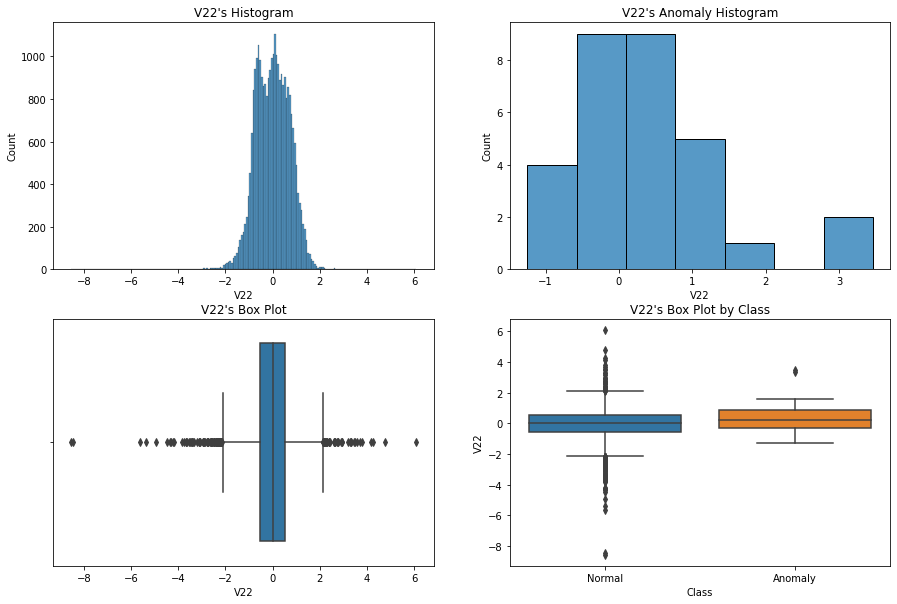


V23의 최대값 : 18.94673403604
V23의 최소값 : -25.3567442522144
V23의 평균값 : 0.0014899996081086722
V23의 중앙값 : -0.0113721579693287
V23의 표준편차 : 0.5880762970060013



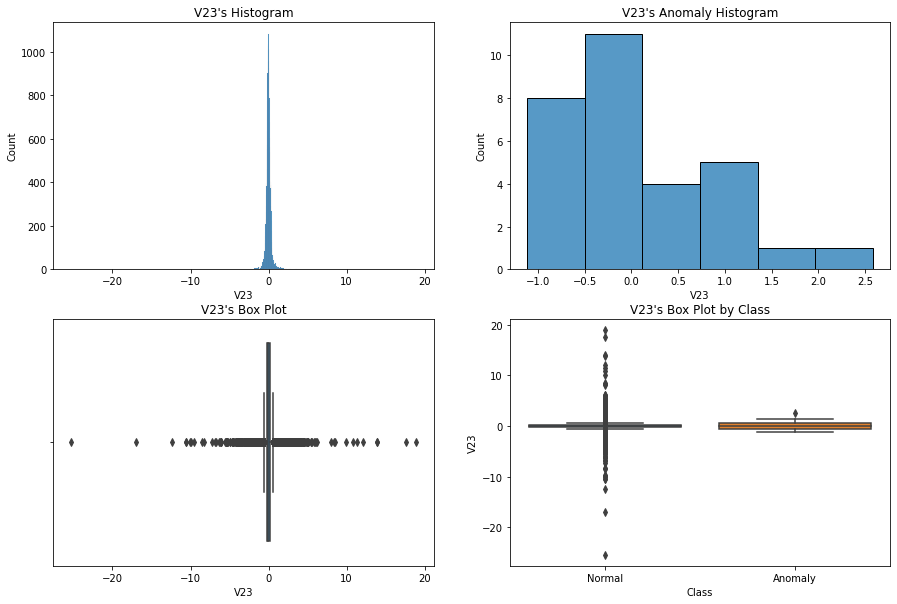


V24의 최대값 : 3.6587458934094
V24의 최소값 : -2.80789696214131
V24의 평균값 : 0.0013551346311998552
V24의 중앙값 : 0.040076148377388446
V24의 표준편차 : 0.6031809248113638



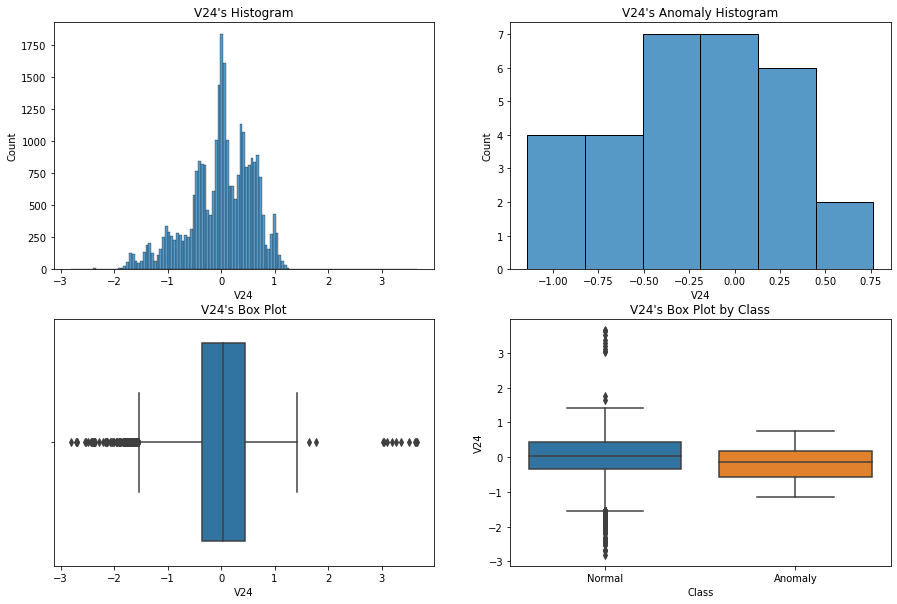


V25의 최대값 : 5.52509270434918
V25의 최소값 : -6.03505426830842
V25의 평균값 : 0.002284470201616712
V25의 중앙값 : 0.01668405859254365
V25의 표준편차 : 0.5268641035054827



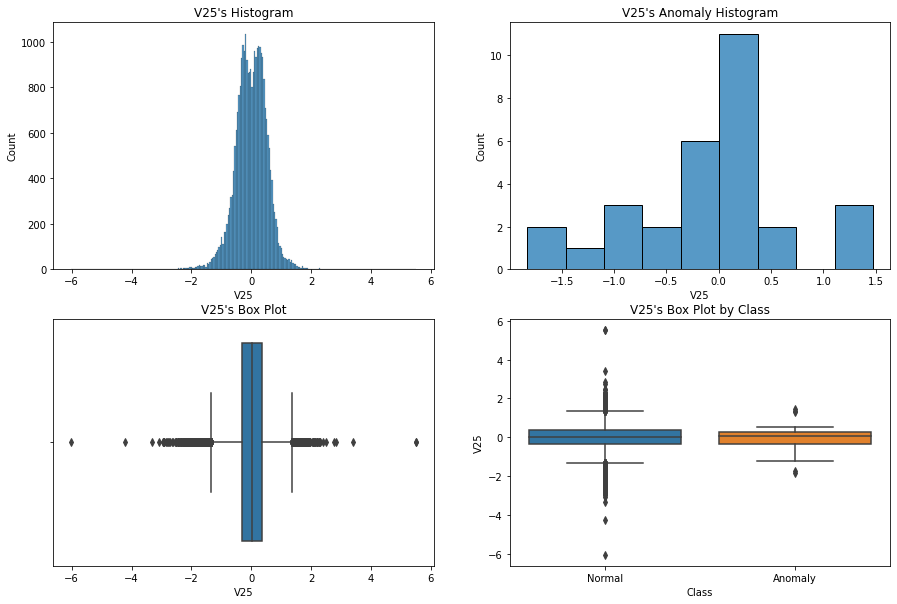


V26의 최대값 : 3.06790743126568
V26의 최소값 : -1.59649266149536
V26의 평균값 : 0.0005195586804373462
V26의 중앙값 : -0.049582848825607304
V26의 표준편차 : 0.4848042431517888



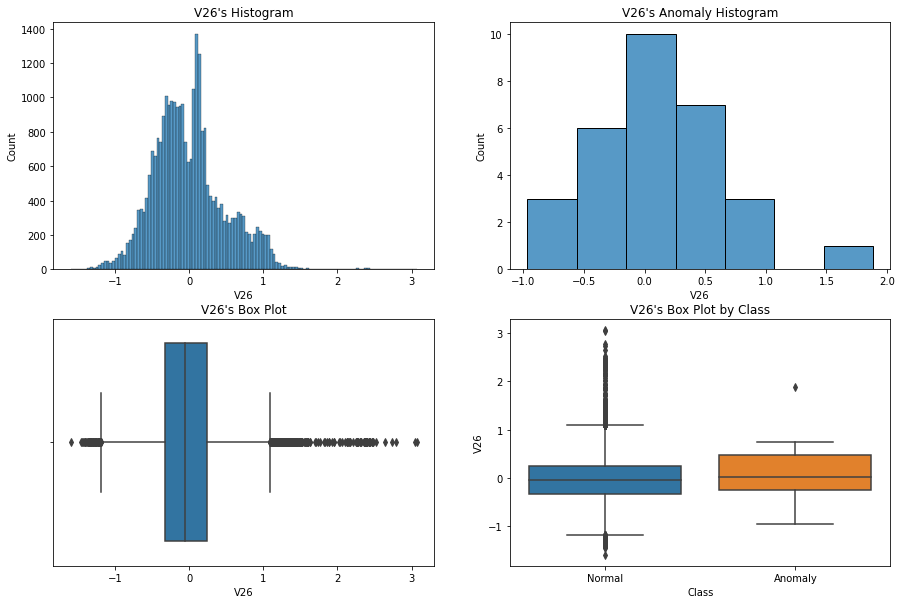


V27의 최대값 : 8.70897233953388
V27의 최소값 : -9.79356790513751
V27의 평균값 : -0.0005200606217028765
V27의 중앙값 : 0.00048752100191104997
V27의 표준편차 : 0.3942348959421319



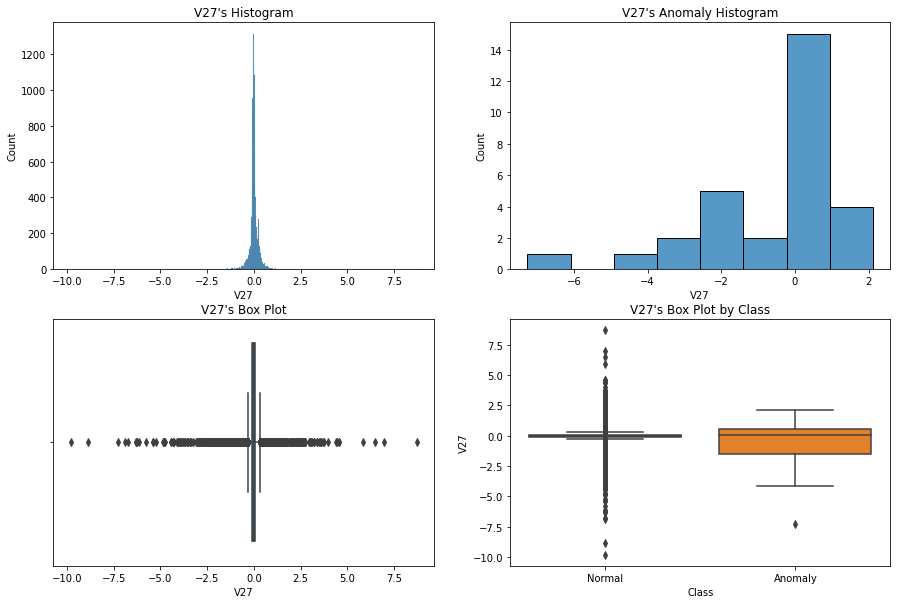


V28의 최대값 : 15.7268065997888
V28의 최소값 : -8.36485333190981
V28의 평균값 : -0.00026526827972482727
V28의 중앙값 : 0.01213774545318715
V28의 표준편차 : 0.3042841701246513



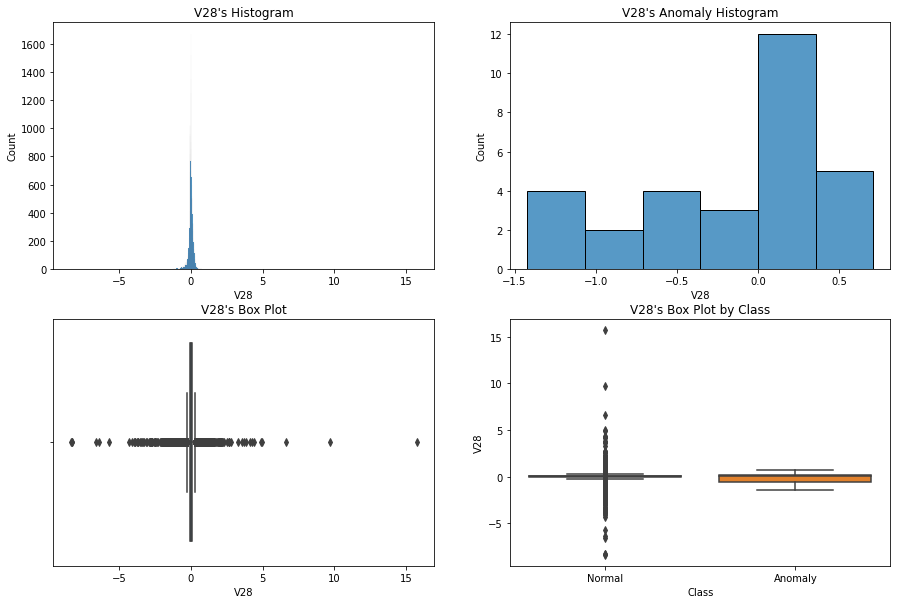


V29의 최대값 : 165.94829874938867
V29의 최소값 : -0.3074128414727869
V29의 평균값 : 0.9240101725428976
V29의 중앙값 : 0.0055893243904142
V29의 표준편차 : 3.3475549482243614



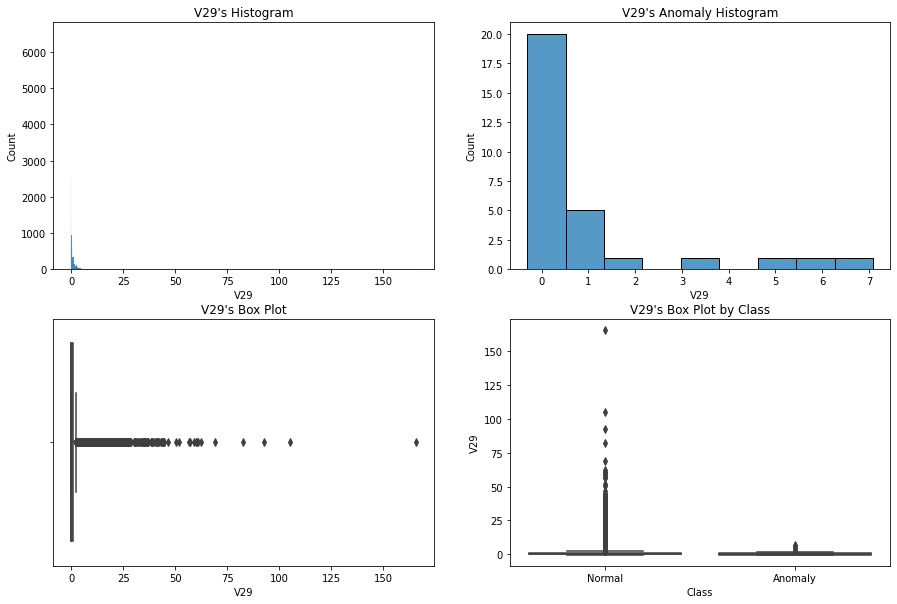


V30의 최대값 : 1.0349745650207356
V30의 최소값 : -0.994877759372173
V30의 평균값 : 0.11991557229857243
V30의 중앙값 : 0.0021558054018491
V30의 표준편차 : 0.5582457479716566



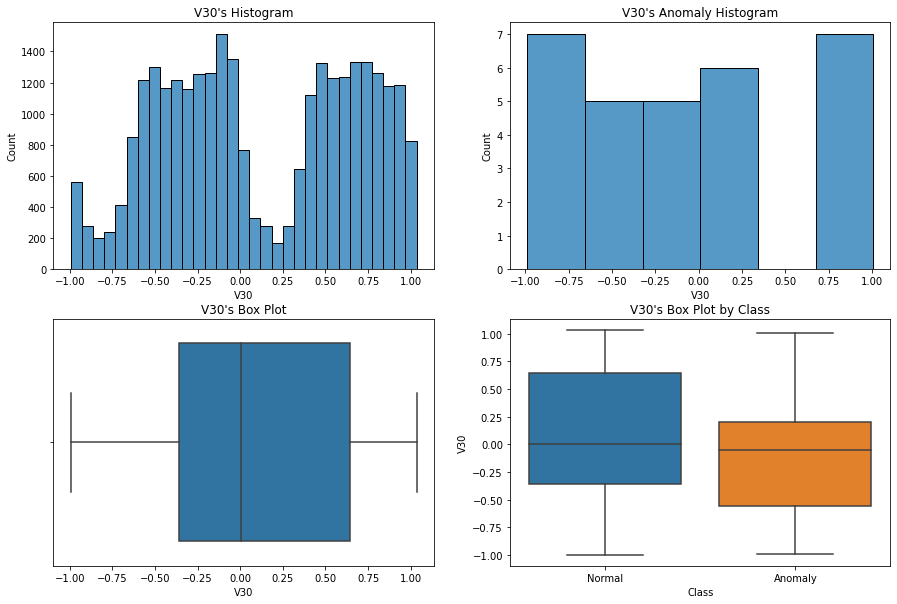

In [33]:
EDA_Data_Set_2(data=val, drop_columns=['ID'])

## Train & Val


Train V1의 최대값 : 2.45492999121121
Val V1의 최대값 : 2.41176914096716

Train V1의 최소값 : -56.407509631329
Val V1의 최소값 : -29.51612308269

Train V1의 평균값 : 0.00019729098661136333
Val V1의 평균값 : 0.0049667869432142705

Train V1의 중앙값 : 0.01207362136827825
Val V1의 중앙값 : 0.023586294744262

Train V1의 표준편차 : 1.9510604522492707
Val V1의 표준편차 : 1.9306399181872773



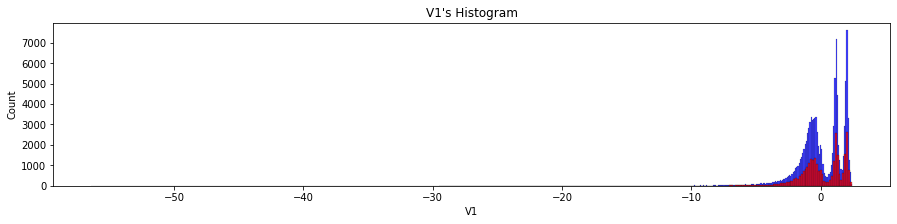


Train V2의 최대값 : 21.4672029942752
Val V2의 최대값 : 16.497471901867

Train V2의 최소값 : -72.7157275629303
Val V2의 최소값 : -38.3053101842846

Train V2의 평균값 : 0.0012887947752847964
Val V2의 평균값 : 0.002014126365322109

Train V2의 중앙값 : 0.06639026082044969
Val V2의 중앙값 : 0.07547006061396991

Train V2의 표준편차 : 1.6510635788198469
Val V2의 표준편차 : 1.605198334957249



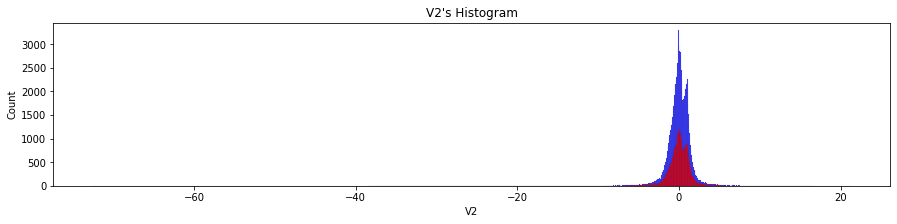


Train V3의 최대값 : 4.18781059904763
Val V3의 최대값 : 4.22610848028397

Train V3의 최소값 : -32.4541981862547
Val V3의 최소값 : -30.1773174564996

Train V3의 평균값 : 0.009717362937767754
Val V3의 평균값 : 0.0014137261772706811

Train V3의 중앙값 : 0.183867815323936
Val V3의 중앙값 : 0.17578352941122

Train V3의 표준편차 : 1.4969157270583686
Val V3의 표준편차 : 1.4997486930725425



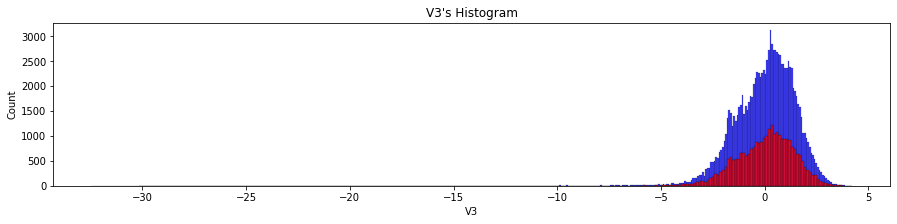


Train V4의 최대값 : 16.4912171736623
Val V4의 최대값 : 12.1146718424589

Train V4의 최소값 : -5.6006071412151
Val V4의 최소값 : -5.07124131015808

Train V4의 평균값 : -0.004169208277632673
Val V4의 평균값 : 0.0018925265959060338

Train V4의 중앙값 : -0.019359487922923302
Val V4의 중앙값 : -0.02161930995486135

Train V4의 표준편차 : 1.412633171594734
Val V4의 표준편차 : 1.4051386461227313



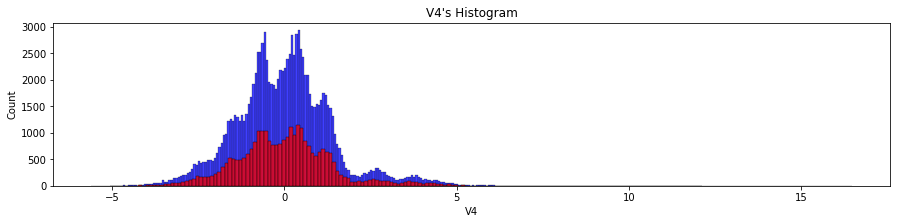


Train V5의 최대값 : 34.8016658766686
Val V5의 최대값 : 24.3453104894197

Train V5의 최소값 : -42.1478983728015
Val V5의 최소값 : -21.5770187944452

Train V5의 평균값 : 0.00047499618187236547
Val V5의 평균값 : -0.003968809374979428

Train V5의 중앙값 : -0.054059608935735054
Val V5의 중앙값 : -0.05278004050669385

Train V5의 표준편차 : 1.367533486735317
Val V5의 표준편차 : 1.3351471626344458



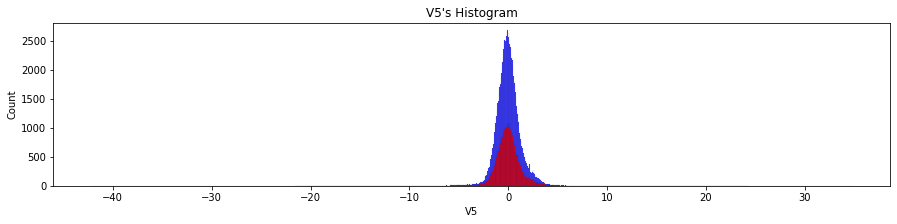


Train V6의 최대값 : 23.9178371266367
Val V6의 최대값 : 12.1289504125238

Train V6의 최소값 : -26.1605059358433
Val V6의 최소값 : -16.1726142472149

Train V6의 평균값 : 0.005141157690735944
Val V6의 평균값 : -0.01772964458938549

Train V6의 중앙값 : -0.272435589201947
Val V6의 중앙값 : -0.280742243126128

Train V6의 표준편차 : 1.3305827734281754
Val V6의 표준편차 : 1.2922144806789229



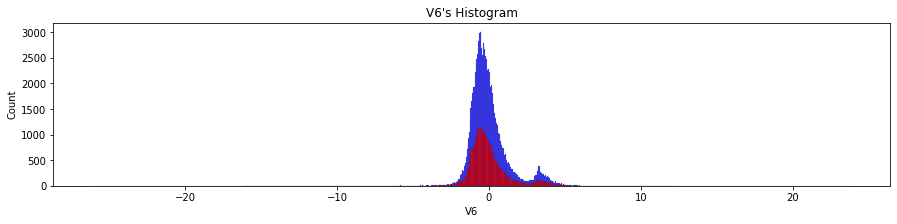


Train V7의 최대값 : 44.0544613631638
Val V7의 최대값 : 26.2377221989235

Train V7의 최소값 : -41.5067960832574
Val V7의 최소값 : -31.1973285494605

Train V7의 평균값 : 0.0057690238842603115
Val V7의 평균값 : 0.005555630415827993

Train V7의 중앙값 : 0.039036187676720846
Val V7의 중앙값 : 0.046279641142595404

Train V7의 표준편차 : 1.2041108132981733
Val V7의 표준편차 : 1.1651322380412819



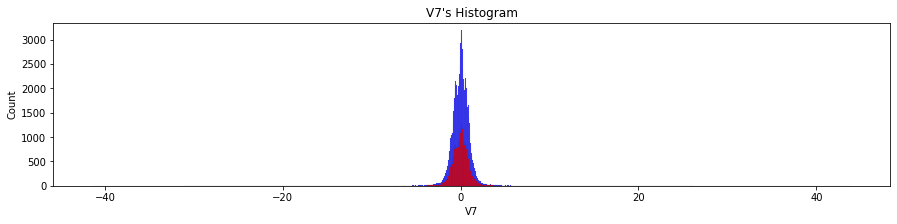


Train V8의 최대값 : 20.0072083651213
Val V8의 최대값 : 12.4311404723263

Train V8의 최소값 : -50.9433688677023
Val V8의 최소값 : -26.2780073456916

Train V8의 평균값 : -0.0024505883004975835
Val V8의 평균값 : 0.009023011049873238

Train V8의 중앙값 : 0.0209696520444015
Val V8의 중앙값 : 0.02262170687997565

Train V8의 표준편차 : 1.1855042538309344
Val V8의 표준편차 : 1.1035376657073763



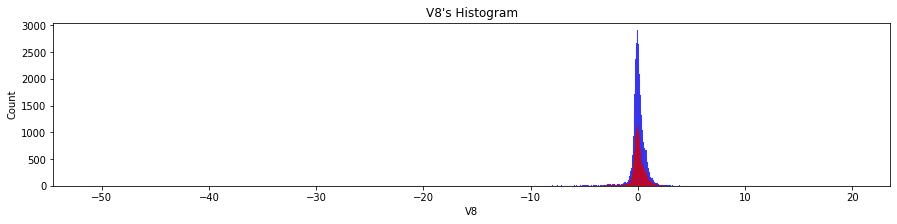


Train V9의 최대값 : 10.3928888246785
Val V9의 최대값 : 7.93741281438886

Train V9의 최소값 : -13.4340663182301
Val V9의 최소값 : -9.46257260540015

Train V9의 평균값 : -0.002107068687996854
Val V9의 평균값 : -0.0049046109716675505

Train V9의 중앙값 : -0.0521569296307329
Val V9의 중앙값 : -0.06662254963706975

Train V9의 표준편차 : 1.0954151622035642
Val V9의 표준편차 : 1.0908428749008365



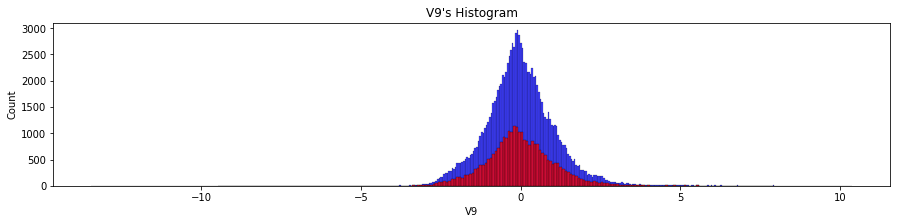


Train V10의 최대값 : 15.3317415557881
Val V10의 최대값 : 12.1618895253889

Train V10의 최소값 : -24.4031849699728
Val V10의 최소값 : -22.1870885620007

Train V10의 평균값 : 0.005209412662028898
Val V10의 평균값 : -0.0022988978086047793

Train V10의 중앙값 : -0.0908096855072013
Val V10의 중앙값 : -0.09938615695686615

Train V10의 표준편차 : 1.0713372717719878
Val V10의 표준편차 : 1.0845602186545011



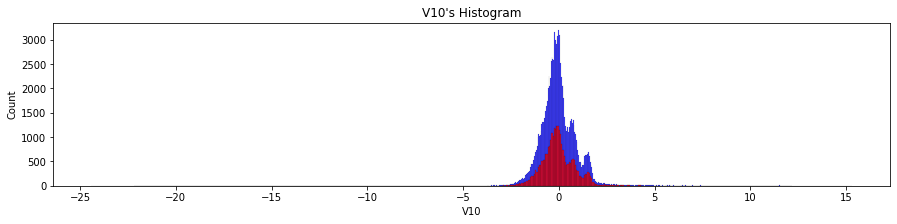


Train V11의 최대값 : 10.446846814514
Val V11의 최대값 : 10.8530116481991

Train V11의 최소값 : -4.68293054765276
Val V11의 최소값 : -4.45385284150054

Train V11의 평균값 : -0.0016864005258888273
Val V11의 평균값 : 0.004006781755657953

Train V11의 중앙값 : -0.03440545072255165
Val V11의 중앙값 : -0.03352678462360805

Train V11의 표준편차 : 1.01468861204786
Val V11의 표준편차 : 1.0165069542359406



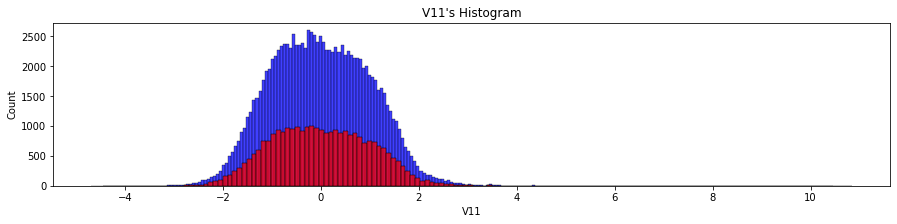


Train V12의 최대값 : 4.31807083997779
Val V12의 최대값 : 4.20268513071349

Train V12의 최소값 : -18.5536970096458
Val V12의 최소값 : -16.0603057628826

Train V12의 평균값 : 0.003944336708458373
Val V12의 평균값 : 0.0024803582087939515

Train V12의 중앙값 : 0.14143396998729552
Val V12의 중앙값 : 0.137369558777824

Train V12의 표준편차 : 0.9770393721889566
Val V12의 표준편차 : 0.9907307300192104



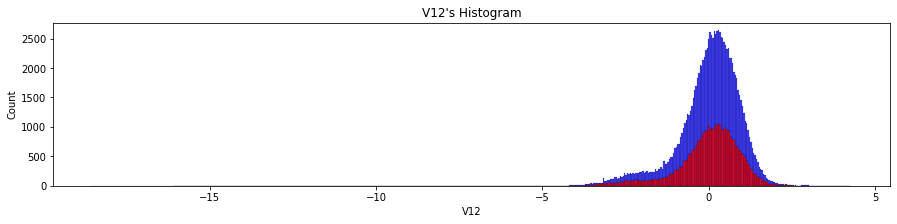


Train V13의 최대값 : 4.56900895856606
Val V13의 최대값 : 4.46541317709086

Train V13의 최소값 : -3.84497361209561
Val V13의 최소값 : -3.84894314852575

Train V13의 평균값 : 0.0020432913532953444
Val V13의 평균값 : 0.004170312115240116

Train V13의 중앙값 : -0.010846694558323149
Val V13의 중앙값 : -0.0123174635608043

Train V13의 표준편차 : 0.9949080604768155
Val V13의 표준편차 : 1.000558497099591



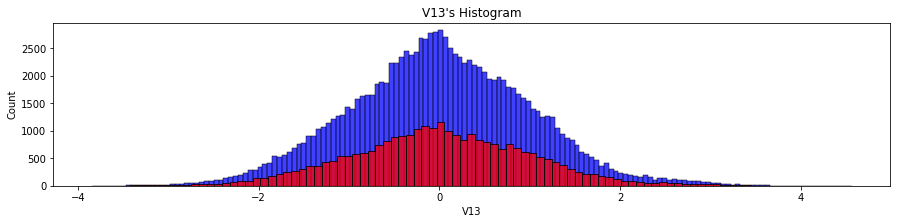


Train V14의 최대값 : 7.51840278124594
Val V14의 최대값 : 7.69220854356782

Train V14의 최소값 : -15.6231873302985
Val V14의 최소값 : -14.9529810390579

Train V14의 평균값 : 0.004397322699922775
Val V14의 평균값 : 0.012298899880292084

Train V14의 중앙값 : 0.0521569486240506
Val V14의 중앙값 : 0.0596796082743124

Train V14의 표준편차 : 0.9337533293727834
Val V14의 표준편차 : 0.9387524563366265



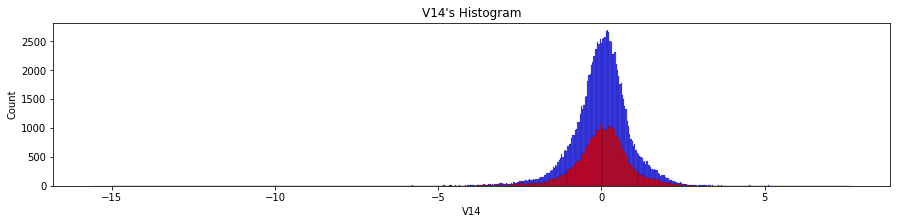


Train V15의 최대값 : 5.78451388962946
Val V15의 최대값 : 3.84573771222941

Train V15의 최소값 : -4.15253175950472
Val V15의 최소값 : -4.39130706780494

Train V15의 평균값 : -0.0005004147332574053
Val V15의 평균값 : 0.0031773891275799554

Train V15의 중앙값 : 0.048524452221400144
Val V15의 중앙값 : 0.053606202878213605

Train V15의 표준편차 : 0.9156656449739775
Val V15의 표준편차 : 0.91374716524497



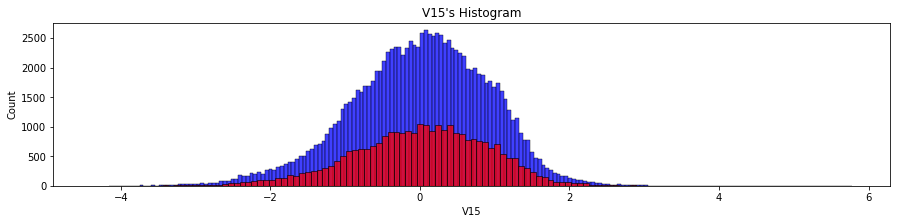


Train V16의 최대값 : 8.28988955954619
Val V16의 최대값 : 4.46222918501709

Train V16의 최소값 : -13.30388757707
Val V16의 최소값 : -12.675268899047

Train V16의 평균값 : 0.002905432082529999
Val V16의 평균값 : 0.004912565699131202

Train V16의 중앙값 : 0.0664341250021616
Val V16의 중앙값 : 0.07093079437153765

Train V16의 표준편차 : 0.8649033262281823
Val V16의 표준편차 : 0.8642892796858322



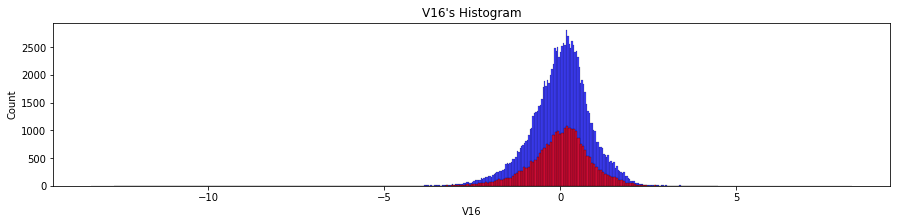


Train V17의 최대값 : 9.25352625047285
Val V17의 최대값 : 6.98354540000001

Train V17의 최소값 : -21.2979057823155
Val V17의 최소값 : -20.7406637223494

Train V17의 평균값 : 0.003397329184032439
Val V17의 평균값 : 0.007552178839944638

Train V17의 중앙값 : -0.06693894995534486
Val V17의 중앙값 : -0.06617395002655896

Train V17의 표준편차 : 0.80855207696864
Val V17의 표준편차 : 0.8215279789899009



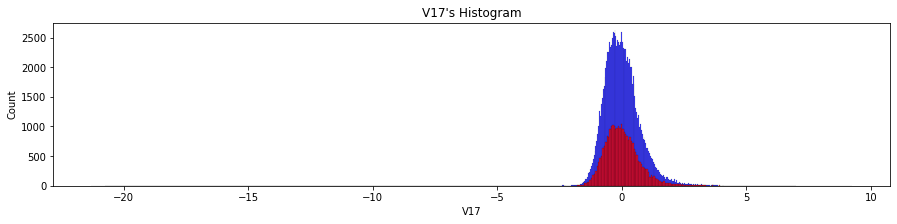


Train V18의 최대값 : 4.2956482344645
Val V18의 최대값 : 3.50591639849878

Train V18의 최소값 : -8.66881519685045
Val V18의 최소값 : -8.15366802624724

Train V18의 평균값 : 0.0011144019564926022
Val V18의 평균값 : 0.005732750100152666

Train V18의 중앙값 : -0.0046325153441596
Val V18의 중앙값 : 0.0008903603231762501

Train V18의 표준편차 : 0.8307631372452877
Val V18의 표준편차 : 0.8332798954824993



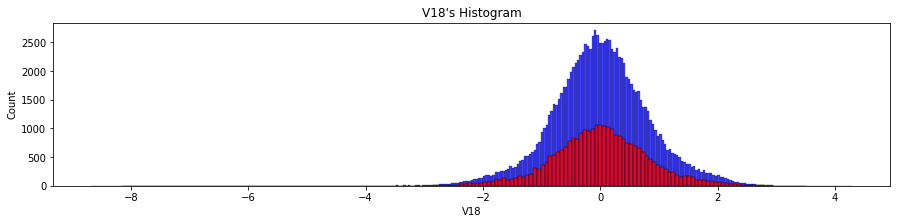


Train V19의 최대값 : 4.71514167078375
Val V19의 최대값 : 5.59197142733558

Train V19의 최소값 : -4.93273305547833
Val V19의 최소값 : -4.19714532925075

Train V19의 평균값 : 0.0003000597969664966
Val V19의 평균값 : 0.00014635166290159594

Train V19의 중앙값 : 0.00465697882936915
Val V19의 중앙값 : 0.00039663696864185

Train V19의 표준편차 : 0.8145423008581303
Val V19의 표준편차 : 0.8088973487376115



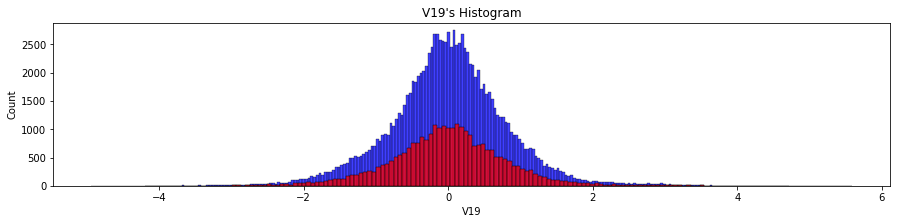


Train V20의 최대값 : 26.2373907895659
Val V20의 최대값 : 24.1338941917421

Train V20의 최소값 : -28.009635333749
Val V20의 최소값 : -18.2923079729601

Train V20의 평균값 : -0.0004995680282647515
Val V20의 평균값 : 0.0019279818010212025

Train V20의 중앙값 : -0.0628905006924982
Val V20의 중앙값 : -0.0624809074044428

Train V20의 표준편차 : 0.7633262147916938
Val V20의 표준편차 : 0.7295830443241295



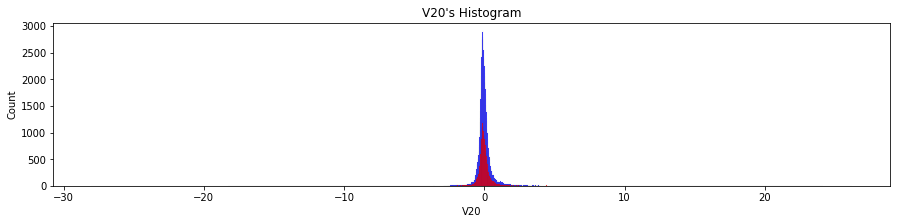


Train V21의 최대값 : 27.2028391573154
Val V21의 최대값 : 22.5995433627945

Train V21의 최소값 : -22.7575398590576
Val V21의 최소값 : -14.0044101719208

Train V21의 평균값 : -0.0012424691313204178
Val V21의 평균값 : 1.3363214228715426e-05

Train V21의 중앙값 : -0.030281477600194097
Val V21의 중앙값 : -0.02943017976292465

Train V21의 표준편차 : 0.7220012926392156
Val V21의 표준편차 : 0.7008590954858377



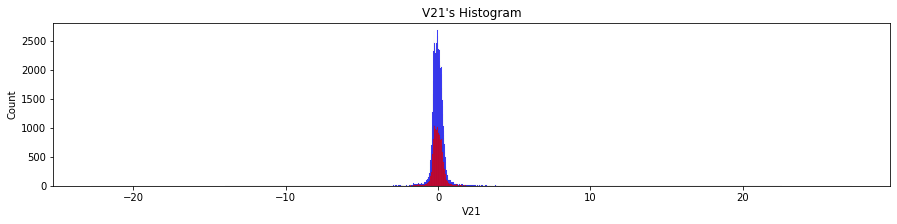


Train V22의 최대값 : 8.36198519168435
Val V22의 최대값 : 6.09051350612959

Train V22의 최소값 : -8.88701714094871
Val V22의 최소값 : -8.55580793045634

Train V22의 평균값 : 4.0883465609378427e-07
Val V22의 평균값 : 0.0012243094032238515

Train V22의 중앙값 : 0.00834580698293555
Val V22의 중앙값 : 0.008400859995146049

Train V22의 표준편차 : 0.723829061858326
Val V22의 표준편차 : 0.721350175699179



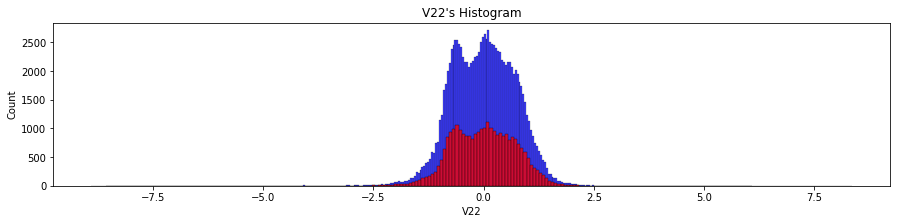


Train V23의 최대값 : 22.5284116897749
Val V23의 최대값 : 18.94673403604

Train V23의 최소값 : -44.8077352037913
Val V23의 최소값 : -25.3567442522144

Train V23의 평균값 : -0.0013174176267935621
Val V23의 평균값 : 0.0014899996081086722

Train V23의 중앙값 : -0.012260984700957801
Val V23의 중앙값 : -0.0113721579693287

Train V23의 표준편차 : 0.6360608348896047
Val V23의 표준편차 : 0.5880762970060013



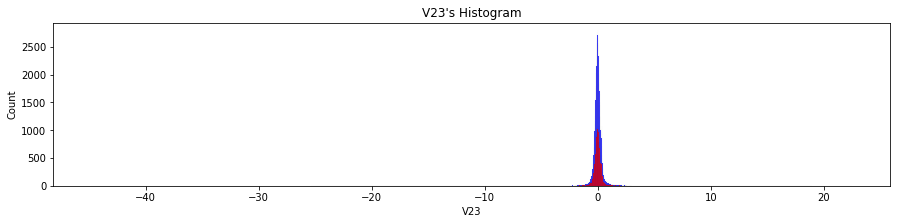


Train V24의 최대값 : 4.02286589044732
Val V24의 최대값 : 3.6587458934094

Train V24의 최소값 : -2.82484890293617
Val V24의 최소값 : -2.80789696214131

Train V24의 평균값 : -0.0008841493522409324
Val V24의 평균값 : 0.0013551346311998552

Train V24의 중앙값 : 0.04057349018340555
Val V24의 중앙값 : 0.040076148377388446

Train V24의 표준편차 : 0.6058543652030749
Val V24의 표준편차 : 0.6031809248113638



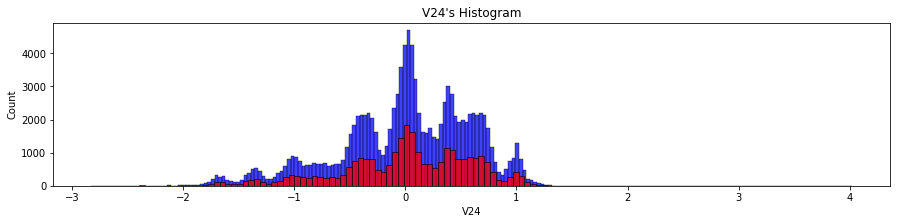


Train V25의 최대값 : 7.51958867870916
Val V25의 최대값 : 5.52509270434918

Train V25의 최소값 : -10.2953970749851
Val V25의 최소값 : -6.03505426830842

Train V25의 평균값 : 0.001680153622333995
Val V25의 평균값 : 0.002284470201616712

Train V25의 중앙값 : 0.018278021175428
Val V25의 중앙값 : 0.01668405859254365

Train V25의 표준편차 : 0.5200694419728161
Val V25의 표준편차 : 0.5268641035054827



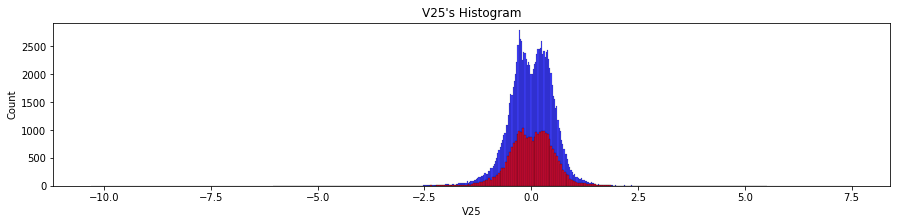


Train V26의 최대값 : 3.11929452903772
Val V26의 최대값 : 3.06790743126568

Train V26의 최소값 : -1.8553553377608
Val V26의 최소값 : -1.59649266149536

Train V26의 평균값 : -0.00029337012564088164
Val V26의 평균값 : 0.0005195586804373462

Train V26의 중앙값 : -0.052815375709404755
Val V26의 중앙값 : -0.049582848825607304

Train V26의 표준편차 : 0.48097857889866485
Val V26의 표준편차 : 0.4848042431517888



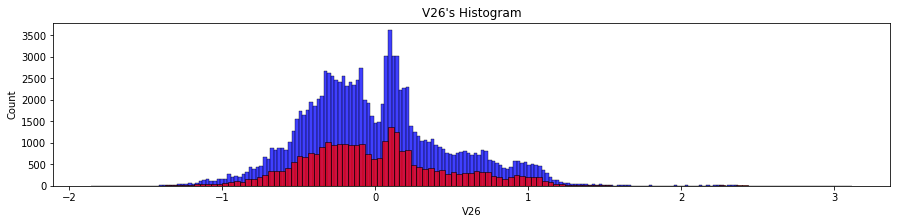


Train V27의 최대값 : 11.1357398445742
Val V27의 최대값 : 8.70897233953388

Train V27의 최소값 : -9.89524404755692
Val V27의 최소값 : -9.79356790513751

Train V27의 평균값 : -0.00023371284253036214
Val V27의 평균값 : -0.0005200606217028765

Train V27의 중앙값 : 0.00150188492327435
Val V27의 중앙값 : 0.00048752100191104997

Train V27의 표준편차 : 0.39950548833452487
Val V27의 표준편차 : 0.3942348959421319



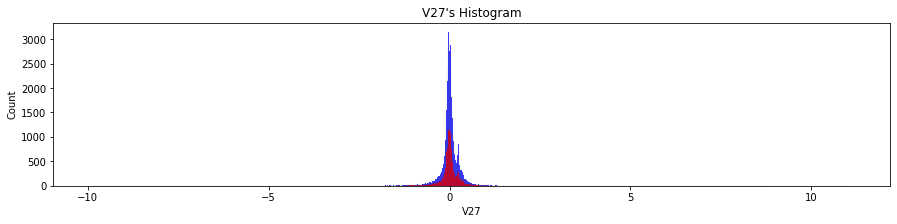


Train V28의 최대값 : 33.8478078188831
Val V28의 최대값 : 15.7268065997888

Train V28의 최소값 : -9.61791545238239
Val V28의 최소값 : -8.36485333190981

Train V28의 평균값 : -0.0005080545516753246
Val V28의 평균값 : -0.00026526827972482727

Train V28의 중앙값 : 0.011158211260897648
Val V28의 중앙값 : 0.01213774545318715

Train V28의 표준편차 : 0.3561296472138799
Val V28의 표준편차 : 0.3042841701246513



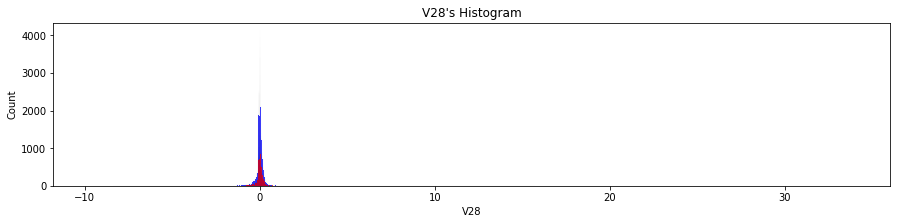


Train V29의 최대값 : 180.10102703835676
Val V29의 최대값 : 165.94829874938867

Train V29의 최소값 : -0.3074128414727869
Val V29의 최소값 : -0.3074128414727869

Train V29의 평균값 : 0.9272530174662471
Val V29의 평균값 : 0.9240101725428976

Train V29의 중앙값 : -0.0006986655488017
Val V29의 중앙값 : 0.0055893243904142

Train V29의 표준편차 : 3.4129328932881196
Val V29의 표준편차 : 3.3475549482243614



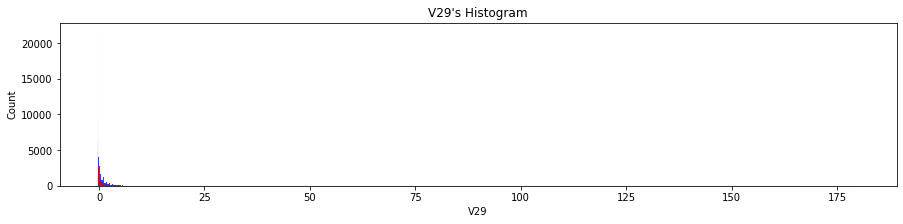


Train V30의 최대값 : 1.0349510685040944
Val V30의 최대값 : 1.0349745650207356

Train V30의 최소값 : -0.9949717454387388
Val V30의 최소값 : -0.994877759372173

Train V30의 평균값 : 0.11623154312648176
Val V30의 평균값 : 0.11991557229857243

Train V30의 중앙값 : -0.00259049095971515
Val V30의 중앙값 : 0.0021558054018491

Train V30의 표준편차 : 0.558160863013255
Val V30의 표준편차 : 0.5582457479716566



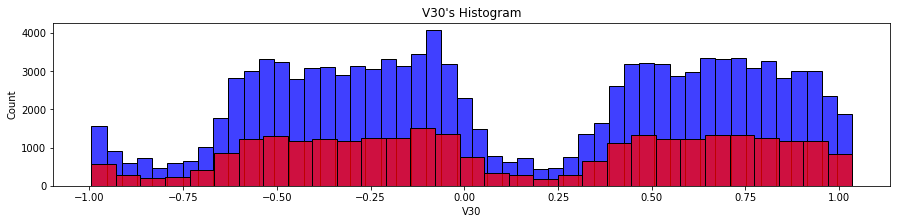

In [34]:
df_train = train.drop(columns='ID')
df_val = val.drop(columns=['ID', 'Class'])

for col in df_train.columns:

  print_statistics_2(df_train, df_val, col)

  fig, ax = plt.subplots(figsize=(15, 3))

  ax = sns.histplot(data=df_train, x=col, color='blue')
  ax = sns.histplot(data=df_val, x=col, color='red')
  ax.set_title(f"{col}'s Histogram")

  plt.show()